# Project: "Predicting Customer Churn in an Iranian Telecom Company."

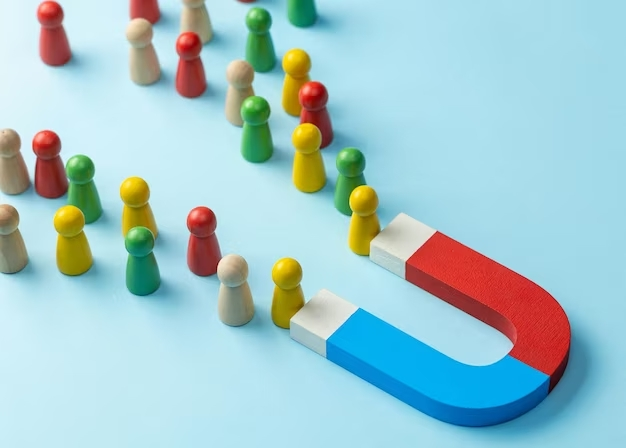

# 1. Introduction

## 1.1 Background Information

In the telecommunications industry, customer churn, or the rate at which customers leave a service, is a crucial metric that impacts the company's revenue and growth. Understanding the factors that lead to customer churn and predicting potential churners can help the company take proactive measures to retain valuable customers.

## 1.2 Objective of the Analysis

The main objective of this analysis is to build a predictive model using logistic regression to identify customers who are likely to churn based on historical data. By predicting potential churners, the telecom company can implement targeted retention strategies, offer personalized promotions, or address customer concerns, ultimately reducing churn rates and enhancing customer loyalty.

## 1.3 Dataset Information

The dataset used in this analysis, named the "Iranian Churn Dataset," was sourced from the UCI Machine Learning Repository. It was donated on 4/8/2020 and is available at the following citation:

Iranian Churn Dataset. (2020). UCI Machine Learning Repository. https://doi.org/10.24432/C5JW3Z.

This dataset was randomly collected from an Iranian telecom company's database over a period of 12 months and comprises information for 3150 customers. Each customer is represented by 13 columns (attributes), providing essential features related to customer behavior and characteristics.

- **Call Failure**: Number of call failures experienced by the customer.

- **Complains**: Binary attribute indicating whether the customer lodged a complaint (0: No complaint, 1: Complaint).

- **Subscription Length**: Total months of the customer's subscription with the telecom company.

- **Charge Amount**: Ordinal attribute indicating the charge amount category (0: Lowest amount, 9: Highest amount).

- **Seconds of Use**: Total seconds of calls made by the customer.

- **Frequency of Use**: Total number of calls made by the customer.

- **Frequency of SMS**: Total number of text messages sent by the customer.

- **Distinct Called Numbers**: Total number of distinct phone calls made by the customer.

- **Age Group**: Ordinal attribute representing the customer's age group (1: Younger age, 5: Older age).

- **Tariff Plan**: Binary attribute indicating the type of service (1: Pay as you go, 2: Contractual).

- **Status**: Binary attribute indicating the customer's status (1: Active, 2: Non-active).

- **Age**: Age of the customer.

- **Customer Value**: The calculated value of the customer (continuous variable).

- **Churn**: Binary attribute, the class label, indicating customer churn (1: Churn, 0: Non-churn).

All attributes, except "Churn," are aggregated data from the first 9 months, and the "Churn" labels represent the customer state at the end of the 12-month period, with a 3-month planning gap for churn prediction.

The analysis will involve data exploration, preprocessing, exploratory data analysis, model building using logistic regression, model evaluation, and recommendations based on the findings.

The main question we are trying to answer in this analysis is: **Can we build an accurate predictive model based on historical data using logistic regression to identify customers who are likely to churn in an Iranian telecom company?** By identifying potential churners, the company can implement targeted retention strategies, offer personalized promotions, or address customer concerns to reduce churn rates and enhance customer loyalty.

# 2. Table Of Contents

<ol>
  <li>
    <h3>Introduction</h3>
    <ol>
      <li>Background Information</li>
      <li>Objective of the Analysis</li>
      <li>Dataset Information</li>
    </ol>
  </li>
  <li>
    <h3>Table Of Contents</h3>
  </li>
  <li>
    <h3>Data Exploration and Preprocessing</h3>
    <ol>
      <li>Loading the Dataset</li>
      <li>Dataset Overview and Structure</li>
      <li>Descriptive Statistics</li>
      <li>Handling Missing Values</li>
      <li>Data Visualization</li>      
    </ol>
  </li>
  <li>
    <h3>Exploratory Data Analysis</h3>
    <ol>
      <li>Churn Distribution</li>
      <li>Analysis of Churn by Different Attributes
        <ol>
          <li>Churn vs. Call Failures</li>
          <li>Churn vs. Number of Complaints</li>
          <li>Churn vs. Subscription Length</li>
          <li>Churn vs. Charge Amount</li>
          <li>Churn vs. Seconds of Use</li>
          <li>Churn vs. Frequency of Use</li>          
          <li>Churn vs. Frequency of SMS</li>
          <li>Churn vs. Number of Distinct Calls</li>
          <li>Churn vs. Age Group</li>          
          <li>Churn vs. Tariff Plan</li>
          <li>Churn vs. Status</li>
          <li>Churn vs. Age</li>
          <li>Churn vs. Customer Value</li>
        </ol>
      </li>
      <li>Correlation Analysis</li>
    </ol>
  </li>
  <li>
    <h3>Model Building</h3>
    <ol>
      <li>Data Preprocessing for Model Training</li>      
      <li>Train-Test Split And SMOTE</li>
      <li>Model Selection - Logistic Regression</li>
      <li>Model Training</li>
      <li>Model Evaluation on Test Set</li>
      <li>Interpretation of Model Coefficients</li>
    </ol>
  </li>
  <li>
    <h3>Model Performance Analysis</h3>
    <ol>
      <li>Confusion Matrix</li>      
      <li>ROC Curve and AUC</li>
    </ol>
  </li>
  <li>
    <h3>Improving Model Performance</h3>
    <ol>      
      <li>Hyperparameter Tuning</li>
      <li>Model Interpretability</li>
      <li>Model Interpretability With SHAP Values</li>
      <li>Sensitivity Analysis</li>
    </ol>
  </li>
  <li>
    <h3>Model Deployment</h3>
    <ol>
      <li>Save the Trained Model</li>
      <li>Deploying the Model for Real-time Predictions</li>
    </ol>
  </li>
  <li>
    <h3>Conclusion</h3>
    <ol>
      <li>Summary of Findings</li>
      <li>Strengths and Limitations of the Model</li>
      <li>Recommendations for the Telecom Company</li>
    </ol>
  </li>
  <li>
    <h3>Future Steps</h3>
    <ol>
      <li>Additional Improvements and Extensions</li>
      <li>Suggested Areas for Further Research</li>
    </ol>
  </li>
</ol>


# 3. Data Exploration and Preprocessing

## 3.1 Loading the Dataset

In [ ]:
!pip install shap

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import joblib
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_ind, mannwhitneyu
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
import statsmodels.api as sm
import scipy.stats as stats
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, roc_auc_score

In [ ]:
# Load the dataset
df = pd.read_csv("Customer Churn.csv")

## 3.2 Dataset Overview and Structure

In [ ]:
# Preview dataset
df.head()

Call  Failure  Complains  Subscription  Length  Charge  Amount  \
0              8          0                    38               0   
1              0          0                    39               0   
2             10          0                    37               0   
3             10          0                    38               0   
4              3          0                    38               0   

   Seconds of Use  Frequency of use  Frequency of SMS  \
0            4370                71                 5   
1             318                 5                 7   
2            2453                60               359   
3            4198                66                 1   
4            2393                58                 2   

   Distinct Called Numbers  Age Group  Tariff Plan  Status  Age  \
0                       17          3            1       1   30   
1                        4          2            1       2   25   
2                       24          3            1       1   30   
3                       35          1            1       1   15   
4                       33          1            1       1   15   

   Customer Value  Churn  
0         197.640      0  
1          46.035      0  
2        1536.520      0  
3         240.020      0  
4         145.805      0

In [ ]:
# Dataset overview
print("Dataset Overview:")
print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])
print("\nColumn Names:")
print(df.columns)

Dataset Overview:
Number of Rows: 3150
Number of Columns: 14

Column Names:
Index(['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age',
       'Customer Value', 'Churn'],
      dtype='object')


In [ ]:
# Data types of attributes
print("\nData Types:")
print(df.dtypes)


Data Types:
Call  Failure                int64
Complains                    int64
Subscription  Length         int64
Charge  Amount               int64
Seconds of Use               int64
Frequency of use             int64
Frequency of SMS             int64
Distinct Called Numbers      int64
Age Group                    int64
Tariff Plan                  int64
Status                       int64
Age                          int64
Customer Value             float64
Churn                        int64
dtype: object


## 3.3 Descriptive Statistics

In [ ]:
# Descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
       Call  Failure    Complains  Subscription  Length  Charge  Amount  \
count    3150.000000  3150.000000           3150.000000     3150.000000   
mean        7.627937     0.076508             32.541905        0.942857   
std         7.263886     0.265851              8.573482        1.521072   
min         0.000000     0.000000              3.000000        0.000000   
25%         1.000000     0.000000             30.000000        0.000000   
50%         6.000000     0.000000             35.000000        0.000000   
75%        12.000000     0.000000             38.000000        1.000000   
max        36.000000     1.000000             47.000000       10.000000   

       Seconds of Use  Frequency of use  Frequency of SMS  \
count     3150.000000       3150.000000       3150.000000   
mean      4472.459683         69.460635         73.174921   
std       4197.908687         57.413308        112.237560   
min          0.000000          0.000000          0.0000

## 3.4 Handling Missing Values

In [ ]:
# Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64


In [ ]:
# Check for duplicates
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (300, 14)


In [ ]:
# Drop duplicate values
df = df.drop_duplicates()

In [ ]:
# New info after dropping duplicates
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2850 entries, 0 to 3131
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            2850 non-null   int64  
 1   Complains                2850 non-null   int64  
 2   Subscription  Length     2850 non-null   int64  
 3   Charge  Amount           2850 non-null   int64  
 4   Seconds of Use           2850 non-null   int64  
 5   Frequency of use         2850 non-null   int64  
 6   Frequency of SMS         2850 non-null   int64  
 7   Distinct Called Numbers  2850 non-null   int64  
 8   Age Group                2850 non-null   int64  
 9   Tariff Plan              2850 non-null   int64  
 10  Status                   2850 non-null   int64  
 11  Age                      2850 non-null   int64  
 12  Customer Value           2850 non-null   float64
 13  Churn                    2850 non-null   int64  
dtypes: float64(1), int64(13)

In [ ]:
# Shape of final dataset
df.shape

(2850, 14)

In [ ]:
# Check for the unique values of each column
df.nunique()

Call  Failure                37
Complains                     2
Subscription  Length         45
Charge  Amount               11
Seconds of Use             1756
Frequency of use            242
Frequency of SMS            405
Distinct Called Numbers      92
Age Group                     5
Tariff Plan                   2
Status                        2
Age                           5
Customer Value             2654
Churn                         2
dtype: int64

We notice that the names of the columns do not have appropriate names to be ready for use and some of them have more than one gap between them. We will rename the columns to have appropriate names and eliminate multiple gaps between them, making them ready for further use in the analysis and the modeling task.

In [ ]:
# Define the new column names
new_column_names = ['Call_Failure', 'Complains', 'Subscription_Length', 'Charge_Amount', 'Seconds_of_Use',
                    'Frequency_of_use', 'Frequency_of_SMS', 'Distinct_Called_Numbers', 'Age_Group', 'Tariff_Plan',
                    'Status', 'Age', 'Customer_Value', 'Churn']

# Rename the columns
df.columns = new_column_names

# Verify the new column names
print(df.columns)

Index(['Call_Failure', 'Complains', 'Subscription_Length', 'Charge_Amount',
       'Seconds_of_Use', 'Frequency_of_use', 'Frequency_of_SMS',
       'Distinct_Called_Numbers', 'Age_Group', 'Tariff_Plan', 'Status', 'Age',
       'Customer_Value', 'Churn'],
      dtype='object')


We will make a copy of the dataset to use it later for sensitivity analysis.

In [ ]:
# Make a copy of the original dataframe
df_copy = df.copy()

## 3.5 Data Visualization

Let's have a quick and informative overview of the distribution of our numerical data in the DataFrame.

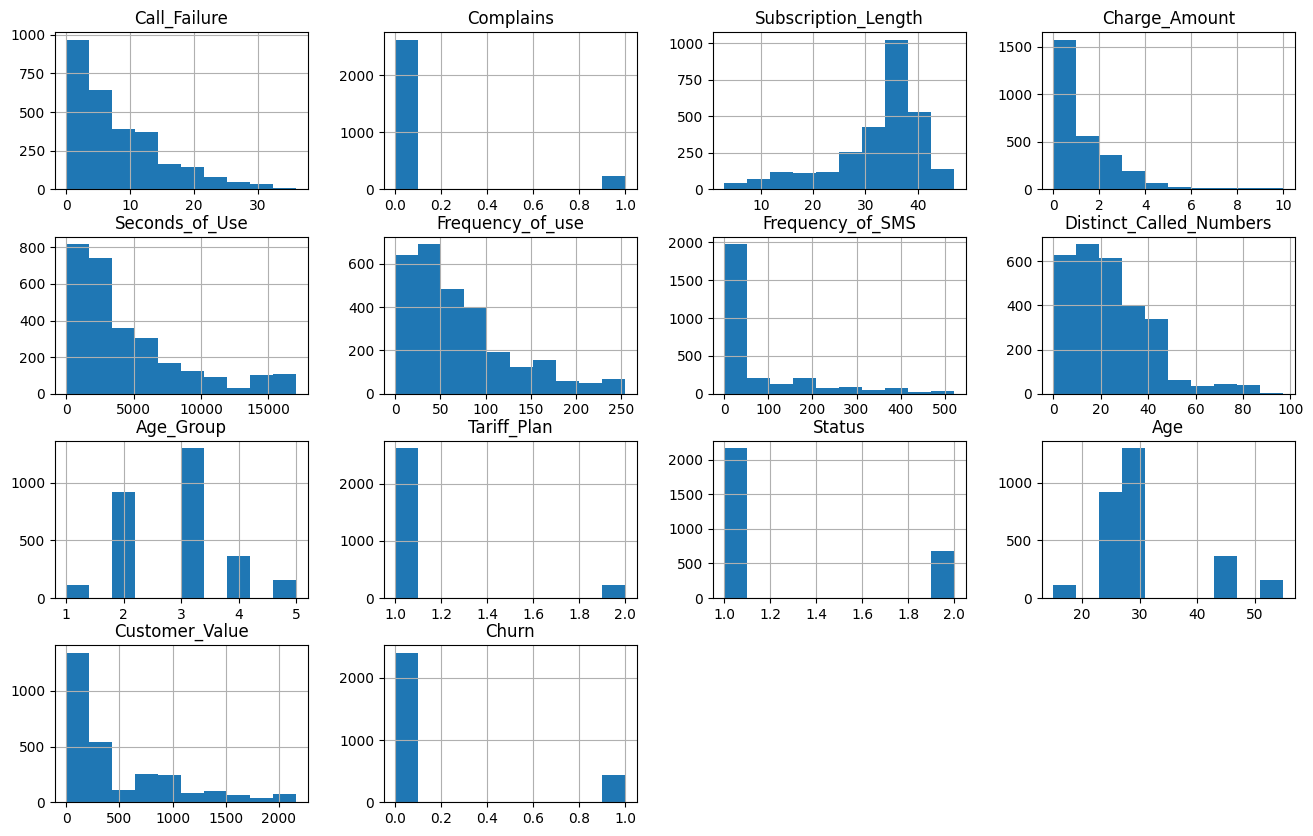

In [ ]:
# Data Visualization using histograms
df.hist(bins=10, figsize=(16, 10))
plt.show()

# 4. Exploratory Data Analysis

## 4.1 Churn Distribution

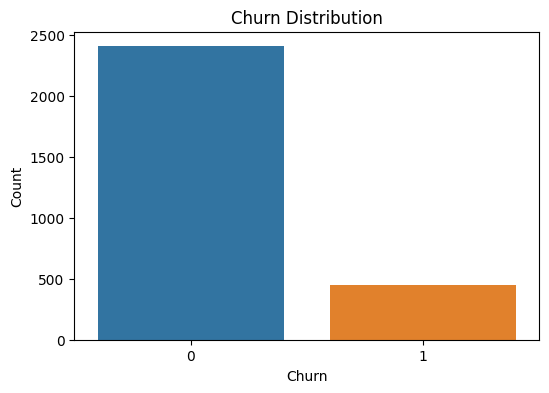

In [ ]:
# Countplot the proportion of churned customers
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn')
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

In [ ]:
# Explore the actual numbers
df['Churn'].value_counts()

0    2404
1     446
Name: Churn, dtype: int64

The churn distribution provides valuable information about the number of customers who have churned (churn = 1) and the number of customers who have not churned (churn = 0) in the dataset.

In this case, the churn distribution is as follows:

**Churn = 0**: There are 2404 customers who have not churned. These are customers who are still active and have not terminated their subscriptions during the observation period.

**Churn = 1**: There are 446 customers who have churned. These are customers who have terminated their subscriptions or stopped using the telecom services during the observation period.

From this churn distribution, we can observe that the number of non-churned customers is significantly higher than the number of churned customers. This is expected as churn events are generally less frequent compared to non-churn events in most subscription-based services.

The class imbalance between churned and non-churned customers will be taken into consideration later in this project, when building the predictive model for churn prediction. Models that do not account for class imbalance might be biased towards predicting the majority class (non-churn) more accurately, while underperforming on the minority class (churn).

## 4.2 Analysis of Churn by Different Attributes

### 4.2.1 Churn vs. Call Failures

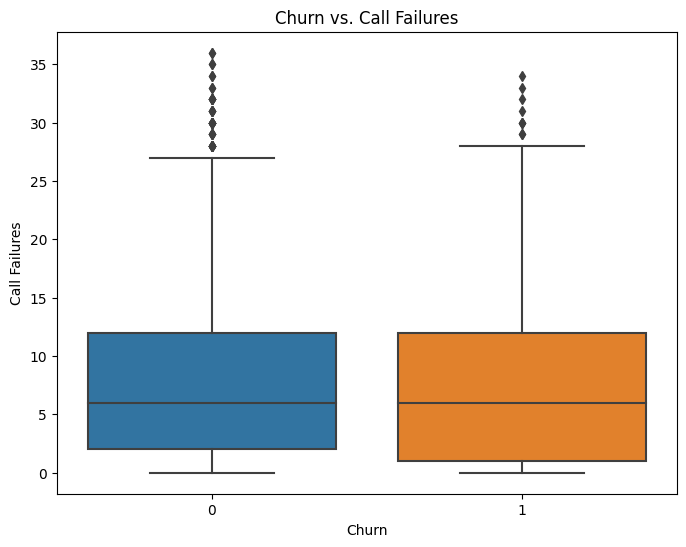

In [ ]:
# Visualize the relationship between churn and the number of call failures experienced by the customer.
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Churn', y='Call_Failure')
plt.title("Churn vs. Call Failures")
plt.xlabel("Churn")
plt.ylabel("Call Failures")
plt.show()

As we notice in the boxplot above, the boxes are quite similar, indicating that there might not be a significant difference in the number of call failures between churned and non-churned customers.

To further investigate,we will conduct a statistical test, such as Mann-Whitney U test, that can help us determine if the difference in call failures between the two groups is statistically significant.

But before that, let's check those outliers.

In [ ]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1_call_failure = df['Call_Failure'].quantile(0.25)
Q3_call_failure = df['Call_Failure'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR_call_failure = Q3_call_failure - Q1_call_failure

# Calculate the lower and upper bounds for outliers
lower_bound_call_failure = Q1_call_failure - 1.5 * IQR_call_failure
upper_bound_call_failure = Q3_call_failure + 1.5 * IQR_call_failure

# Identify outliers based on the bounds
outliers_call_failure = df[(df['Call_Failure'] < lower_bound_call_failure) | (df['Call_Failure'] > upper_bound_call_failure)]

# Get the number of outliers
num_outliers_call_failure = len(outliers_call_failure)

# Print the number of outliers
print("Number of outliers in 'Call_Failure':", num_outliers_call_failure)

Number of outliers in 'Call_Failure': 44


In [ ]:
# Calculate the percentage of outliers in 'Call_Failure'
percentage_outliers_call_failure = (num_outliers_call_failure / len(df['Call_Failure'])) * 100

print("Percentage of outliers in 'Call_Failure':", round(percentage_outliers_call_failure, 2), "%")

Percentage of outliers in 'Call_Failure': 1.54 %


Finding that only 1.54% of the data points in the 'Call_Failure' variable are considered outliers suggests that the majority of the data falls within a reasonable range. Outliers are data points that lie significantly far from the rest of the data and can potentially impact the analysis and model performance. However, with such a low percentage of outliers, it is less likely that they would have a substantial effect on the overall results and interpretations. Additionally, the statistical test Mann-Whitney U test afterwards will not show any significant difference in call failures between the two groups.

The distribution of "Call_Failure," is right-skewed (i.e., positively skewed), as we saw earlier in the histograms, and means that there are more data points with low values and fewer data points with high values. In such cases, it might be appropriate to use non-parametric statistical tests like the Mann-Whitney U test, especially when the assumptions of normality required for the t-test are not met.

The Mann-Whitney U test is well-suited for situations where the data is not normally distributed or when the sample sizes are small. It does not rely on the assumption of normality and is robust to outliers. Hence, in cases of skewed data, the Mann-Whitney U test can provide a more reliable assessment of whether there are significant differences between groups.

In [ ]:
# Separate 'Call Failure' values for churned and non-churned customers
call_failures_churned = df[df['Churn'] == 1]['Call_Failure']
call_failures_non_churned = df[df['Churn'] == 0]['Call_Failure']

# Perform a Mann-Whitney U test to determine if the difference in call failures is statistically significant
u_statistic, p_value_mwu = mannwhitneyu(call_failures_churned, call_failures_non_churned)

# Display the results of the statistical tests
print("\nStatistical Test Results:")
print(f"Mann-Whitney U p-value: {p_value_mwu:.4f}")


Statistical Test Results:
Mann-Whitney U p-value: 0.4331


In summary, since the distribution of "Call_Failure" is right-skewed, relying on the Mann-Whitney U test is a reasonable approach to test for significant differences in call failures between churned and non-churned customers. The obtained p-value (0.4331) from the Mann-Whitney U test suggests that there is no statistically significant difference in call failures between the two groups.

### 4.2.2 Churn vs. Number of Complaints

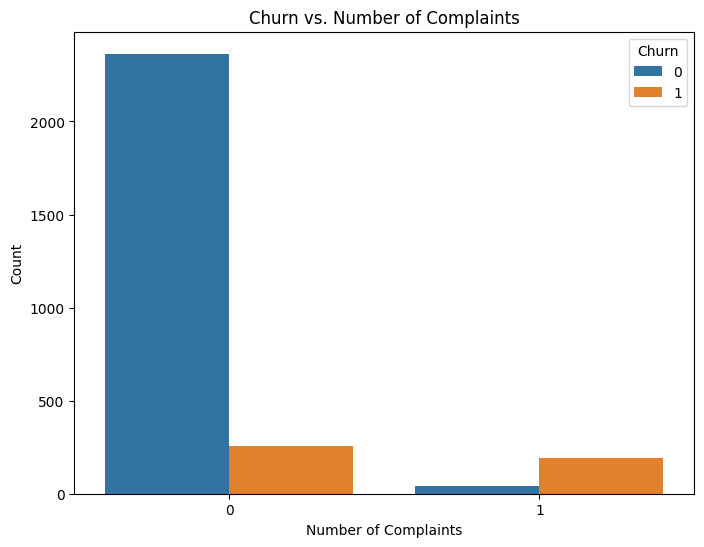

In [ ]:
# Investigate the relationship between churn and the number of complaints lodged by the customer.
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Complains', hue='Churn')
plt.title("Churn vs. Number of Complaints")
plt.xlabel("Number of Complaints")
plt.ylabel("Count")
plt.show()

In [ ]:
# Let's have a idea on the numbers included
df['Complains'].groupby(df['Churn']).value_counts()

Churn  Complains
0      0            2364
       1              40
1      0             256
       1             190
Name: Complains, dtype: int64

This visualization suggests that customers who lodged complaints are more likely to churn than those who did not lodge any complaints. However, to draw any statistically significant conclusions, we may need to perform further analysis, such as calculating the percentage of churn for customers with and without complaints, and conducting statistical tests to evaluate if the relationship is significant.

In [ ]:
# Calculate the percentage of churn for customers with and without complaints
total_customers_with_complaints = df[df['Complains'] == 1].shape[0]
total_churned_with_complaints = df[(df['Complains'] == 1) & (df['Churn'] == 1)].shape[0]
percentage_churn_with_complaints = (total_churned_with_complaints / total_customers_with_complaints) * 100

total_customers_without_complaints = df[df['Complains'] == 0].shape[0]
total_churned_without_complaints = df[(df['Complains'] == 0) & (df['Churn'] == 1)].shape[0]
percentage_churn_without_complaints = (total_churned_without_complaints / total_customers_without_complaints) * 100

print("Percentage of Churn for Customers with Complaints:", round(percentage_churn_with_complaints,2), "%")
print("Percentage of Churn for Customers without Complaints:", round(percentage_churn_without_complaints,2), "%")

Percentage of Churn for Customers with Complaints: 82.61 %
Percentage of Churn for Customers without Complaints: 9.77 %


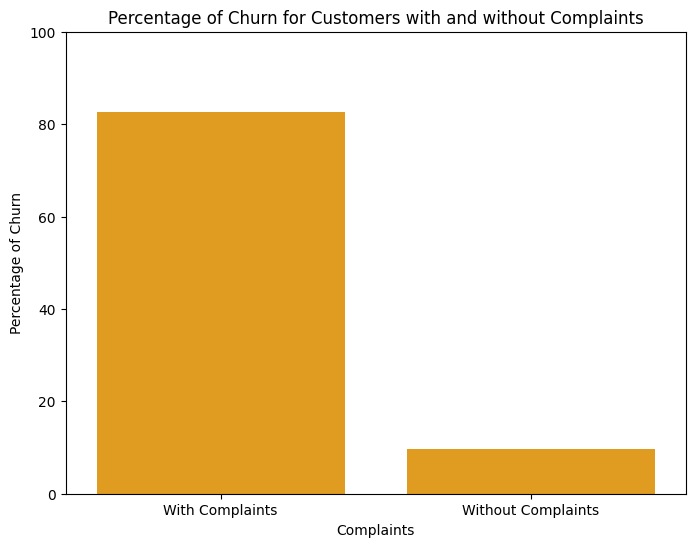

In [ ]:
# Create a bar plot using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=['With Complaints', 'Without Complaints'], y=[percentage_churn_with_complaints, percentage_churn_without_complaints], color='orange')
plt.title("Percentage of Churn for Customers with and without Complaints")
plt.xlabel("Complaints")
plt.ylabel("Percentage of Churn")
plt.ylim(0, 100)
plt.show()

The results indicate a significant relationship between complaints and churn. The percentages of churn for customers with and without complaints are quite different, with 82.61% of customers with complaints and only 9.77% of customers without complaints churning.

Here, we perform a chi-square test to determine if there is a significant association between 'Complains' and 'Churn' in the dataset. The resulting p-value will help in making a conclusion about whether the two variables are associated or independent.

It evaluates whether the observed frequency distribution in the contingency table is significantly different from the expected frequency distribution under the assumption that the two variables are independent.

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df['Complains'], df['Churn'])

# Perform chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

print("Chi-Square Test p-value:", p)

Chi-Square Test p-value: 1.2662937233962688e-185


The chi-square test yielded very low p-value (much smaller than the common significance level of 0.05), providing strong evidence against the null hypothesis that complaints and churn are independent. Therefore, we can confidently conclude that there is a significant association between customer complaints and churn in the dataset.

### 4.2.3 Churn vs. Subscription Length

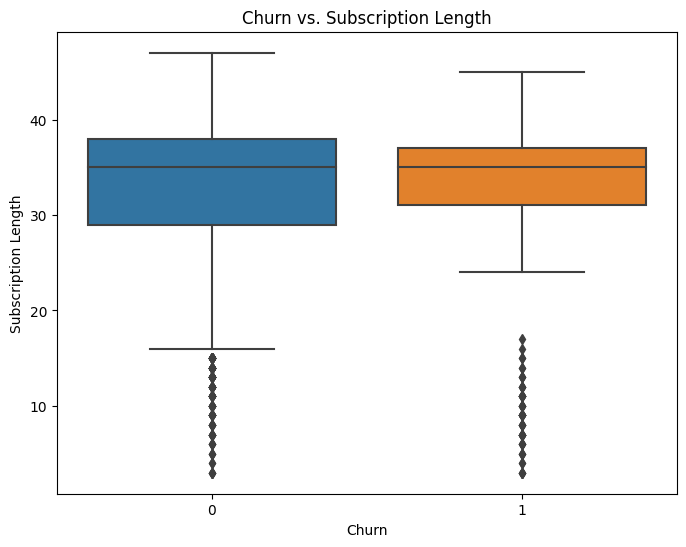

In [ ]:
# Analyze the correlation between churn and the total months of the customer's subscription.
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Churn', y='Subscription_Length')
plt.title("Churn vs. Subscription Length")
plt.xlabel("Churn")
plt.ylabel("Subscription Length")
plt.show()

In the boxplot above, the box representing churned customers (Churn=1) is smaller, indicating a narrower range of subscription lengths compared to non-churned customers (Churn=0). The median subscription length for both churned and non-churned customers appears to be at a similar level.

The presence of outliers in the lower whisker of both groups indicates that there are some customers, both churned and non-churned, with subscription lengths that are significantly different from the majority of customers.

In [ ]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1_subscription_length = df['Subscription_Length'].quantile(0.25)
Q3_subscription_length = df['Subscription_Length'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR_subscription_length = Q3_subscription_length - Q1_subscription_length

# Calculate the lower and upper bounds for outliers
lower_bound_subscription_length = Q1_subscription_length - 1.5 * IQR_subscription_length
upper_bound_subscription_length = Q3_subscription_length + 1.5 * IQR_subscription_length

# Identify outliers based on the bounds
outliers_subscription_length = df[(df['Subscription_Length'] < lower_bound_subscription_length) | (df['Subscription_Length'] > upper_bound_subscription_length)]

# Get the number of outliers
num_outliers_subscription_length = len(outliers_subscription_length)

# Print the number of outliers
print("Number of outliers in 'Subscription_Length':", num_outliers_subscription_length)

Number of outliers in 'Subscription_Length': 208


In [ ]:
# Calculate the percentage of outliers in 'Subscription_Length'
percentage_outliers_subscription_length = (num_outliers_subscription_length / len(df['Subscription_Length'])) * 100

print("Percentage of outliers in 'Subscription_Length':", round(percentage_outliers_subscription_length, 2), "%")

Percentage of outliers in 'Subscription_Length': 7.3 %


With approximately 7.3% outliers, it's essential to consider their potential impact on the analysis and model performance. Outliers can significantly influence summary statistics and model predictions, so it's worth exploring their nature and considering various approaches.

Our approach is to leave outliers as-is, since we believe these are genuine values and are not due to data entry errors. Moreover, logistic regression is robust to outliers, and their presence may not significantly impact the model's performance. Our second choice to handle this would be to create a categorical variable like "Short-Term," "Medium-Term," and "Long-Term" subscriptions based on specific thresholds. This can help capture the essence of the variable while reducing the impact of outliers. But it is not the case for now.

To gain a better understanding of the distribution, we can conduct a Mann-Whitney U test to help assess if there is a significant difference in subscription lengths between churned and non-churned customers.

In [ ]:
# Separate the data into churned and non-churned customers
churned_customers = df[df['Churn'] == 1]
non_churned_customers = df[df['Churn'] == 0]

# Perform the Mann-Whitney U test
u_statistic, u_p_value = mannwhitneyu(churned_customers['Subscription_Length'], non_churned_customers['Subscription_Length'])

# Display the test results
print("Mann-Whitney U p-value:", u_p_value)

Mann-Whitney U p-value: 0.07770285281408061


With a Mann-Whitney U p-value of 0.0777, the test result suggests that there is no significant difference in subscription lengths between churned and non-churned customers. The p-value is greater than the common significance level of 0.05, indicating that we do not have strong evidence to reject the null hypothesis. Therefore, based on the Mann-Whitney U test, we cannot conclude that there is a statistically significant difference in subscription lengths between the two groups.

### 4.2.4 Churn vs. Charge Amount

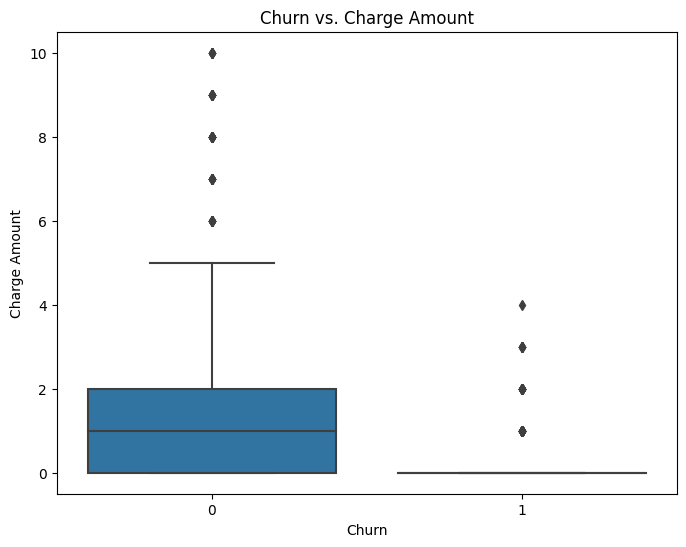

In [ ]:
# Examine the relationship between churn and the ordinal attribute indicating the charge amount category.
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Churn', y='Charge_Amount')
plt.title("Churn vs. Charge Amount")
plt.xlabel("Churn")
plt.ylabel("Charge Amount")
plt.show()

From the box plot above, we can observe that the distribution of charge amounts is quite different for churned customers (Churn=1) and non-churned customers (Churn=0). The box plot for churned customers shows a straight line at zero, which suggests that the majority of churned customers have zero charge amounts. On the other hand, the box plot for non-churned customers shows a wider spread of charge amounts, with some outliers present on the upper whisker.

In [ ]:
# Filter the original df into two separate DataFrames based on the 'Churn' column
churned_customers = df[df['Churn'] == 1]
non_churned_customers = df[df['Churn'] == 0]

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(churned_customers['Charge_Amount'], non_churned_customers['Charge_Amount'], alternative='two-sided')

print("\nMann-Whitney U Test Results:")
print("Test Statistic:", statistic)
print("p-value:", p_value)


Mann-Whitney U Test Results:
Test Statistic: 344753.0
p-value: 6.017132713944325e-40


The p-value is extremely small (6.017132713944325e-40), indicating strong evidence against the null hypothesis. Therefore, we can conclude that there is a significant difference in charge amounts between churned and non-churned customers.

Since the p-value is much smaller than the typical significance level of 0.05, we can reject the null hypothesis and infer that the difference in charge amounts is not due to random chance. This finding suggests that the charge amount may be an important factor in predicting customer churn.

Another thing that came up from the previous boxplot is the zero charges seen on the churned category. The presence of a straight line at zero in the box plot for churned customers suggests that a significant portion of churned customers have a charge amount of zero. There could be several reasons for this observation, some of which we can think of are:

Free Services: Some customers may have received free services or promotional offers from the telecom company, which resulted in a charge amount of zero.

Early Termination: Customers who churned early in their subscription may not have incurred any charges if they canceled their service before any billing cycle.

Credit Adjustments: Customers who experienced issues with the service or billing may have received credit adjustments, resulting in a charge amount of zero.

It's essential to investigate further and understand the specific reasons behind the zero charge amounts for churned customers in order to gain insights into customer behavior and improve the understanding of churn dynamics. Analyzing further customer profiles and transaction history may help identify patterns and reasons for this observation.

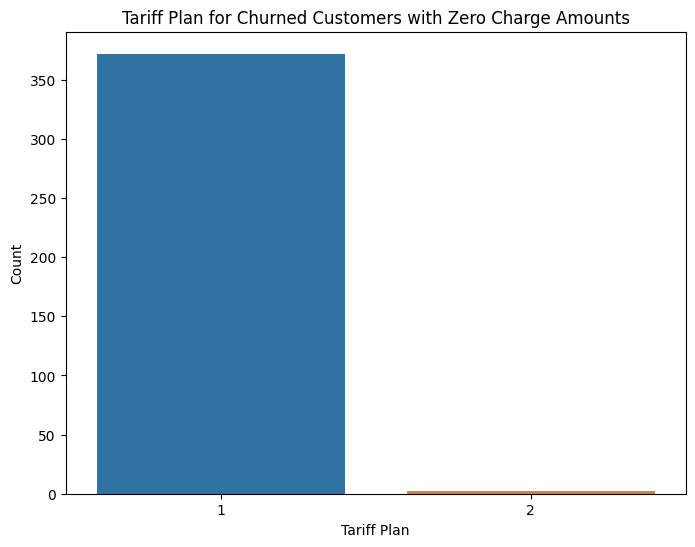

In [ ]:
# Create a DataFrame for churned customers with zero charge amounts
churned_zero_charge = df[(df['Churn'] == 1) & (df['Charge_Amount'] == 0)]

# Plot a countplot to visualize the distribution of tariff plans for churned customers with zero charge amounts
plt.figure(figsize=(8, 6))
sns.countplot(data=churned_zero_charge, x='Tariff_Plan')
plt.title("Tariff Plan for Churned Customers with Zero Charge Amounts")
plt.xlabel("Tariff Plan")
plt.ylabel("Count")
plt.show()

In [ ]:
# Group by churned_zero_charge with Tariff_Plan
churned_zero_charge['Tariff_Plan'].value_counts()

1    372
2      2
Name: Tariff_Plan, dtype: int64

 Among churned customers with zero charge amounts, 372 customers have a tariff plan of 1 (Pay as you go), and only 2 customers have a tariff plan of 2 (Contractual). This suggests that the majority of churned customers with zero charges are on the Pay as you go plan.

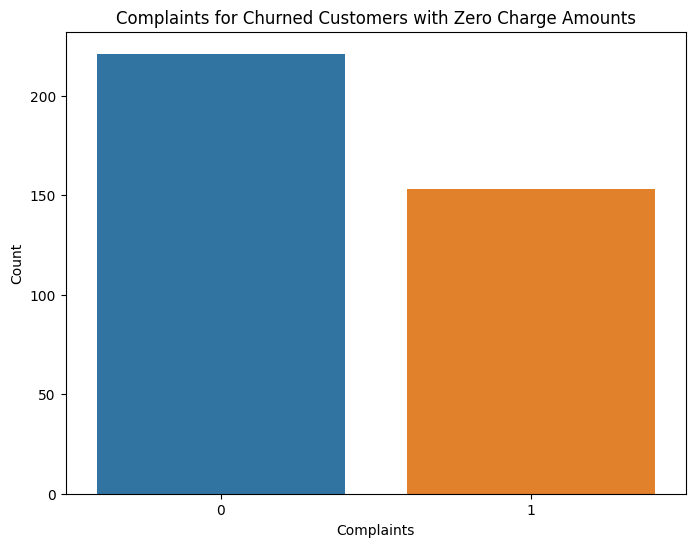

In [ ]:
# Plot a countplot to visualize the distribution of complaints for churned customers with zero charge amounts
plt.figure(figsize=(8, 6))
sns.countplot(data=churned_zero_charge, x='Complains')
plt.title("Complaints for Churned Customers with Zero Charge Amounts")
plt.xlabel("Complaints")
plt.ylabel("Count")
plt.show()

In [ ]:
# Group by churned_zero_charge with Complains
churned_zero_charge['Complains'].value_counts()

0    221
1    153
Name: Complains, dtype: int64

Among churned customers with zero charge amounts, 221 customers have no history of complaints, and 153 customers have a history of complaints. This indicates that a significant number of churned customers with zero charges have had complaints in the past.

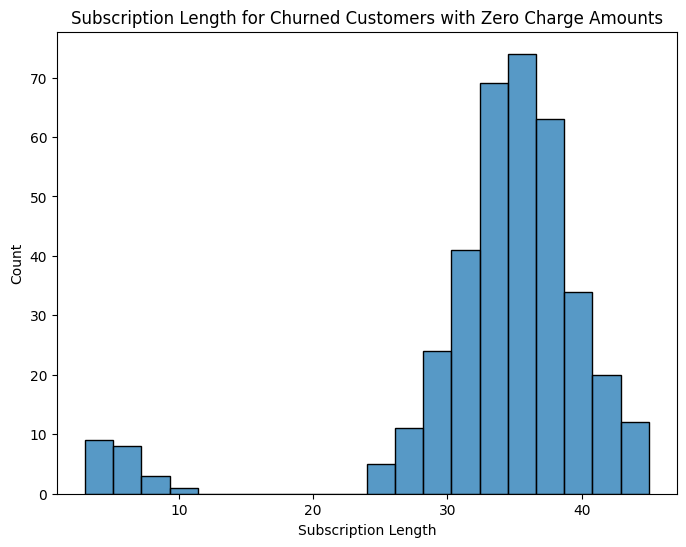

In [ ]:
# Plot a histogram to visualize the distribution of subscription lengths for churned customers with zero charge amounts
plt.figure(figsize=(8, 6))
sns.histplot(data=churned_zero_charge, x='Subscription_Length', bins=20)
plt.title("Subscription Length for Churned Customers with Zero Charge Amounts")
plt.xlabel("Subscription Length")
plt.ylabel("Count")
plt.show()

The churned customers with zero charges have a diverse range of subscription lengths, with the majority having subscription lengths of 34, 35, or 36 months. The distribution of subscription lengths suggests that early terminations are not a common trend for churned customers with zero charges.

In [ ]:
# Calculate summary statistics for usage-related attributes
usage_attributes = ['Seconds_of_Use', 'Frequency_of_use', 'Frequency_of_SMS']
churned_zero_usage_stats = churned_zero_charge[usage_attributes].describe()

print("Summary statistics for usage attributes in churned customers with zero charges:")
print(round(churned_zero_usage_stats, 2))

Summary statistics for usage attributes in churned customers with zero charges:
       Seconds_of_Use  Frequency_of_use  Frequency_of_SMS
count          374.00            374.00            374.00
mean          1495.53             28.84             15.25
std           1427.66             24.67             17.80
min              0.00              0.00              0.00
25%            323.00              6.00              0.00
50%           1043.00             30.00             10.00
75%           2455.50             46.00             24.00
max           5818.00            100.00            186.00


The summary statistics for usage attributes in churned customers with zero charges are as follows:

- Seconds of Use: The mean seconds of use is approximately 1495.53, with a minimum value of 0 and a maximum value of 5818. The standard deviation is approximately 1427.66.
- Frequency of use: The mean frequency of use is approximately 28.84, with a minimum value of 0 and a maximum value of 100. The standard deviation is approximately 24.67.
- Frequency of SMS: The mean frequency of SMS is approximately 15.25, with a minimum value of 0 and a maximum value of 186. The standard deviation is approximately 17.80.

These summary statistics provide insights into the usage patterns of churned customers with zero charges. For example, the average seconds of use and frequency of use are relatively moderate, with some customers having very low or even zero usage. The frequency of SMS is also relatively moderate, with some customers not using SMS at all.

Based on the information provided for churned customers with zero charges:

- Tariff Plan: The majority of churned customers with zero charges (372 out of 374) are on the 'Pay as you go' plan (Tariff Plan 1), while only a small number (2 out of 374) are on the contractual plan (Tariff Plan 2). This suggests that customers on the 'Pay as you go' plan might be more likely to churn without incurring charges.

- Complaints: Out of the churned customers with zero charges, 153 customers have a history of complaints, while 221 customers do not have any complaints. This indicates that a significant portion of churned customers with zero charges have filed complaints, which could have resulted in charge amounts being adjusted or waived.

- Subscription Length: The churned customers with zero charges have varied subscription lengths, ranging from as short as 3 months to as long as 45 months. The most common subscription lengths are around 34 to 38 months. There is no clear pattern of early terminations among churned customers with zero charges.

- Usage Patterns: The summary statistics for usage attributes show that the average seconds of use, frequency of use, and frequency of SMS are moderate. However, some customers have very low or zero usage in these categories, which might have contributed to zero charge amounts.

Overall, these observations suggest that churned customers with zero charges are a diverse group with various usage patterns, plan types, and subscription lengths. Some customers may have experienced billing adjustments due to complaints or other issues, leading to zero charges. It may be beneficial to further investigate individual customer profiles and transaction history to better understand the reasons behind zero charges and churn for this group. Additionally, considering other factors such as plan changes, billing errors, and service usage patterns can provide deeper insights into the drivers of customer churn in this segment.

### 4.2.5 Churn vs. Seconds of Use

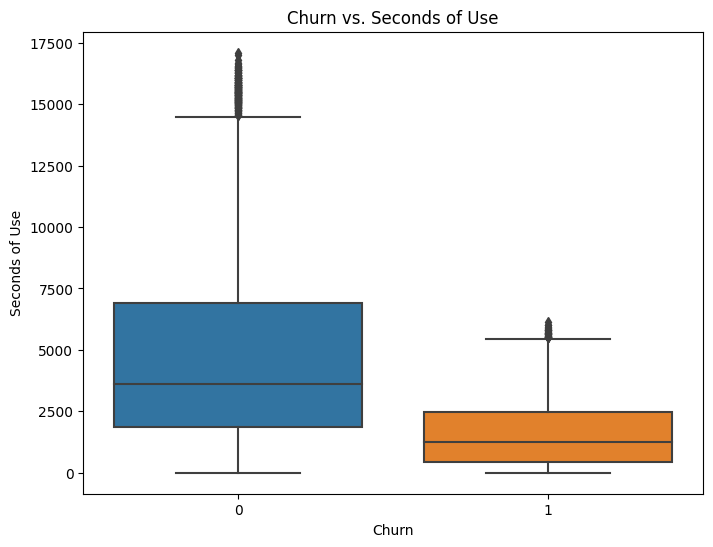

In [ ]:
# Analyze the correlation between churn and the total seconds of calls made by the customer.
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Churn', y='Seconds_of_Use')
plt.title("Churn vs. Seconds of Use")
plt.xlabel("Churn")
plt.ylabel("Seconds of Use")
plt.show()

The box plot for churned customers (Churn=1) shows a smaller range of seconds of use compared to non-churned customers (Churn=0). Churned customers have a box from approximately zero to 2500 seconds of use, indicating that many churned customers have a low usage pattern.

On the other hand, non-churned customers have a wider range of seconds of use, with a box from around 2500 to 7500 seconds of use. This suggests that non-churned customers tend to have more diverse usage patterns, with some customers using the service more extensively.

Both boxes have outliers, indicating that there are customers in both churn groups with extreme usage patterns, either very high or very low. These outliers could potentially be important indicators of churn or specific customer behaviors that may warrant further investigation.


In [ ]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1_seconds_of_use = df['Seconds_of_Use'].quantile(0.25)
Q3_seconds_of_use = df['Seconds_of_Use'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR_seconds_of_use = Q3_seconds_of_use - Q1_seconds_of_use

# Calculate the lower and upper bounds for outliers
lower_bound_seconds_of_use = Q1_seconds_of_use - 1.5 * IQR_seconds_of_use
upper_bound_seconds_of_use = Q3_seconds_of_use + 1.5 * IQR_seconds_of_use

# Identify outliers based on the bounds
outliers_seconds_of_use = df[(df['Seconds_of_Use'] < lower_bound_seconds_of_use) | (df['Seconds_of_Use'] > upper_bound_seconds_of_use)]

# Get the number of outliers
num_outliers_seconds_of_use = len(outliers_seconds_of_use)

# Print the number of outliers
print("Number of outliers in 'Seconds_of_Use':", num_outliers_seconds_of_use)

Number of outliers in 'Seconds_of_Use': 189


In [ ]:
# Calculate the percentage of outliers in 'Seconds_of_Use'
percentage_outliers_seconds_of_use = (num_outliers_seconds_of_use / len(df['Seconds_of_Use'])) * 100

print("Percentage of outliers in 'Seconds_of_Use':", round(percentage_outliers_seconds_of_use, 2), "%")

Percentage of outliers in 'Seconds_of_Use': 6.63 %


Since 'Seconds_of_Use' is a measure of the total seconds of calls made by the customer, having outliers might be reasonable as some customers could indeed have very high usage.

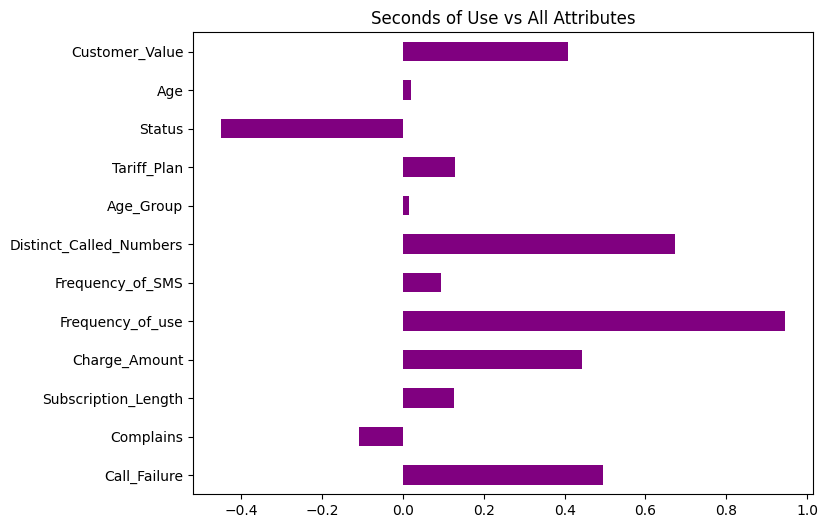

In [ ]:
# Feature importance on Seconds_of_Use vs the rest of the attributes
corr_sec = df.drop(['Churn','Seconds_of_Use'] , axis=1).corrwith(df['Seconds_of_Use']).plot(kind='barh', figsize=(8, 6), color='purple', title="Seconds of Use vs All Attributes")

Based on the correlations above, we can conclude that "Seconds_of_Use" is strongly correlated with "Frequency_of_use" and "Distinct_Called_Numbers," indicating that customer call behavior strongly influences the total seconds of use. Other attributes such as "Charge_Amount," "Customer_Value," and "Status" also have a moderate correlation with "Seconds_of_Use." Age-related attributes, frequency of SMS usage, and complaints have very weak correlations with "Seconds_of_Use."

Correlation does not imply causation. So, further analysis, including statistical tests, can help validate and understand the relationships between these attributes and churn.

In [ ]:
# Split the 'Seconds_of_Use' data into two groups based on 'Churn'
churned_seconds_of_use = df[df['Churn'] == 1]['Seconds_of_Use']
non_churned_seconds_of_use = df[df['Churn'] == 0]['Seconds_of_Use']

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(churned_seconds_of_use, non_churned_seconds_of_use)

# Print the results
print("Mann-Whitney U Test Results:")
print("Test Statistic:", statistic)
print("p-value:", p_value)

Mann-Whitney U Test Results:
Test Statistic: 229084.0
p-value: 1.8437818364023188e-82


The Mann-Whitney U test results indicate that there is a significant difference in the 'Seconds_of_Use' between churned and non-churned customers. The very small p-value (1.84e-82) suggests strong evidence against the null hypothesis of no difference in 'Seconds_of_Use' between the two groups. Therefore, we can conclude that there is a statistically significant relationship between 'Seconds_of_Use' and churn status.

### 4.2.6 Churn vs. Frequency of Use

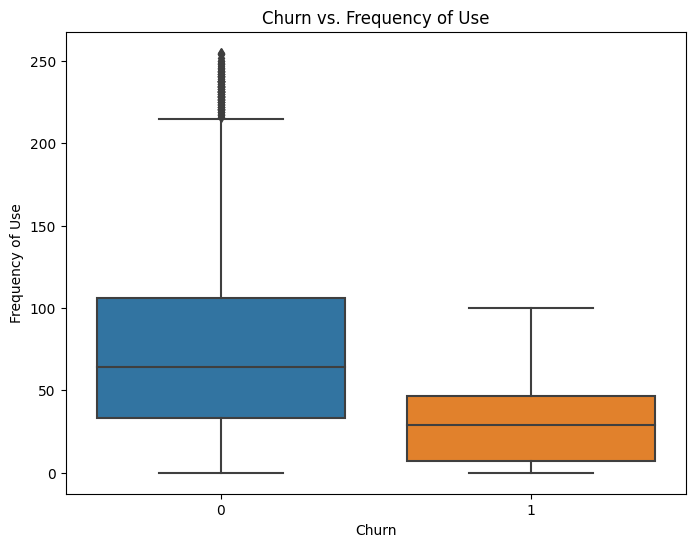

In [ ]:
# Investigate the relationship between churn and the total number of calls made by the customer.
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Churn', y='Frequency_of_use')
plt.title("Churn vs. Frequency of Use")
plt.xlabel("Churn")
plt.ylabel("Frequency of Use")
plt.show()

The boxplot above shows a clear distinction between churned and non-churned customers concerning the frequency of use. Churned customers have a smaller range of call frequencies and lower median compared to non-churned customers. Additionally, there are no outliers in the box for churned customers, while there are some outliers in the box for non-churned customers, indicating higher variation in the frequency of use among non-churned customers.

In [ ]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1_frequency_of_use = df['Frequency_of_use'].quantile(0.25)
Q3_frequency_of_use = df['Frequency_of_use'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR_frequency_of_use = Q3_frequency_of_use - Q1_frequency_of_use

# Calculate the lower and upper bounds for outliers
lower_bound_frequency_of_use = Q1_frequency_of_use - 1.5 * IQR_frequency_of_use
upper_bound_frequency_of_use = Q3_frequency_of_use + 1.5 * IQR_frequency_of_use

# Identify outliers based on the bounds
outliers_frequency_of_use = df[(df['Frequency_of_use'] < lower_bound_frequency_of_use) | (df['Frequency_of_use'] > upper_bound_frequency_of_use)]

# Get the number of outliers
num_outliers_frequency_of_use = len(outliers_frequency_of_use)

# Print the number of outliers
print("Number of outliers in 'Frequency_of_use':", num_outliers_frequency_of_use)

Number of outliers in 'Frequency_of_use': 118


In [ ]:
# Calculate the percentage of outliers in 'Frequency_of_use'
percentage_outliers_frequency_of_use = (num_outliers_frequency_of_use / len(df['Frequency_of_use'])) * 100

print("Percentage of outliers in 'Frequency_of_use':", round(percentage_outliers_frequency_of_use, 2), "%")

Percentage of outliers in 'Frequency_of_use': 4.14 %


The percentage of outliers in 'Frequency_of_use' is less than 5% and so we will try to keep as much information we can for the model later.

To further investigate the relationship between churn and the frequency of use, we can calculate summary statistics (mean, median) for the frequency of use in both churn groups and conduct a statistical test to determine if there is a significant difference in the frequency of use between churned and non-churned customers.

In [ ]:
# Summary statistics for Frequency of Use in churned customers
churned_freq_of_use_mean = df[df['Churn'] == 1]['Frequency_of_use'].mean()
churned_freq_of_use_median = df[df['Churn'] == 1]['Frequency_of_use'].median()

# Summary statistics for Frequency of Use in non-churned customers
non_churned_freq_of_use_mean = df[df['Churn'] == 0]['Frequency_of_use'].mean()
non_churned_freq_of_use_median = df[df['Churn'] == 0]['Frequency_of_use'].median()

print("Summary Statistics for Frequency of Use in Churned Customers:")
print("Mean:", churned_freq_of_use_mean)
print("Median:", churned_freq_of_use_median)

print("\nSummary Statistics for Frequency of Use in Non-Churned Customers:")
print("Mean:", non_churned_freq_of_use_mean)
print("Median:", non_churned_freq_of_use_median)

Summary Statistics for Frequency of Use in Churned Customers:
Mean: 30.69730941704036
Median: 29.0

Summary Statistics for Frequency of Use in Non-Churned Customers:
Mean: 77.86647254575708
Median: 64.0


In [ ]:
# Split the 'Frequency_of_use' data into two groups based on 'Churn'
churned_freq_of_use = df[df['Churn'] == 1]['Frequency_of_use']
non_churned_freq_of_use = df[df['Churn'] == 0]['Frequency_of_use']

# Perform Mann-Whitney U test
test_statistic, p_value = mannwhitneyu(churned_freq_of_use, non_churned_freq_of_use)

print("\nMann-Whitney U Test Results:")
print("Test Statistic:", test_statistic)
print("p-value:", p_value)


Mann-Whitney U Test Results:
Test Statistic: 249981.5
p-value: 7.228963050346978e-72


From the summary statistics and the results of the Mann-Whitney U test, we can make the following observations:

- Frequency of Use: The mean and median frequency of use is significantly lower for churned customers compared to non-churned customers. Churned customers have an average frequency of around 30 calls, while non-churned customers have an average frequency of around 78 calls.

- Statistical Significance: The p-value obtained from the Mann-Whitney U test is extremely small, indicating that there is a statistically significant difference in the frequency of use between churned and non-churned customers.

Therefore, we can conclude that the frequency of use is an important attribute that differentiates churned and non-churned customers. The lower frequency of use may suggest that churned customers are less engaged and less active in using the telecom services, which could be a contributing factor to their decision to churn.

### 4.2.7 Churn vs. Frequency of SMS

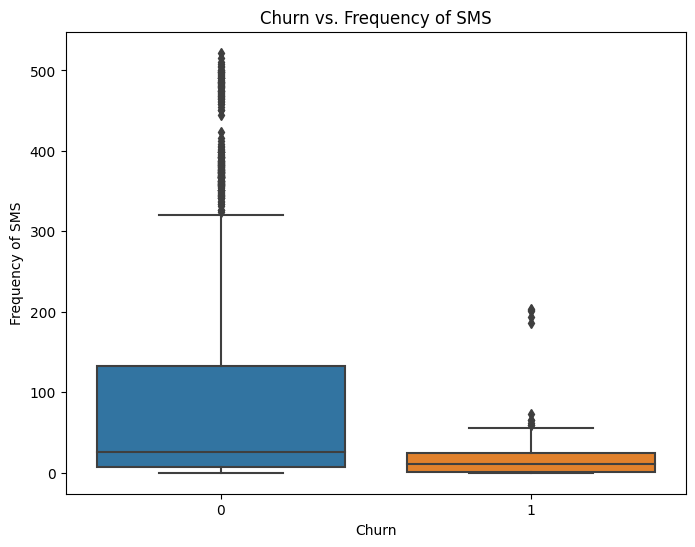

In [ ]:
# Examine how churn varies with the total number of text messages sent by the customer.
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Churn', y='Frequency_of_SMS')
plt.title("Churn vs. Frequency of SMS")
plt.xlabel("Churn")
plt.ylabel("Frequency of SMS")
plt.show()

Based on the box plot above, we can observe the following:

- For churned customers (Churn = 1), the box extends from approximately 0 to around 30 text messages, with a few outliers above this range.
- For non-churned customers (Churn = 0), the box extends from just above 0 to around 140 text messages, with several outliers beyond this range.

This indicates that non-churned customers tend to have a wider range of SMS usage, including some heavy users, whereas churned customers generally have lower SMS usage with fewer extreme values.

In [ ]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1_frequency_of_sms = df['Frequency_of_SMS'].quantile(0.25)
Q3_frequency_of_sms = df['Frequency_of_SMS'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR_frequency_of_sms = Q3_frequency_of_sms - Q1_frequency_of_sms

# Calculate the lower and upper bounds for outliers
lower_bound_frequency_of_sms = Q1_frequency_of_sms - 1.5 * IQR_frequency_of_sms
upper_bound_frequency_of_sms = Q3_frequency_of_sms + 1.5 * IQR_frequency_of_sms

# Identify outliers based on the bounds
outliers_frequency_of_sms = df[(df['Frequency_of_SMS'] < lower_bound_frequency_of_sms) | (df['Frequency_of_SMS'] > upper_bound_frequency_of_sms)]

# Get the number of outliers
num_outliers_frequency_of_sms = len(outliers_frequency_of_sms)

# Print the number of outliers
print("Number of outliers in 'Frequency_of_SMS':", num_outliers_frequency_of_sms)

Number of outliers in 'Frequency_of_SMS': 333


In [ ]:
# Calculate the percentage of outliers in 'Frequency_of_SMS'
percentage_outliers_frequency_of_sms = (num_outliers_frequency_of_sms / len(df['Frequency_of_SMS'])) * 100

print("Percentage of outliers in 'Frequency_of_SMS':", round(percentage_outliers_frequency_of_sms, 2), "%")

Percentage of outliers in 'Frequency_of_SMS': 11.68 %


In [ ]:
# Calculate summary statistics for Frequency of SMS in Churned Customers
churned_sms_mean = df[df['Churn'] == 1]['Frequency_of_SMS'].mean()
churned_sms_median = df[df['Churn'] == 1]['Frequency_of_SMS'].median()

# Calculate summary statistics for Frequency of SMS in Non-Churned Customers
non_churned_sms_mean = df[df['Churn'] == 0]['Frequency_of_SMS'].mean()
non_churned_sms_median = df[df['Churn'] == 0]['Frequency_of_SMS'].median()

# Print the results
print("Summary Statistics for Frequency of SMS in Churned Customers:")
print("Mean:", churned_sms_mean)
print("Median:", churned_sms_median)

print("\nSummary Statistics for Frequency of SMS in Non-Churned Customers:")
print("Mean:", non_churned_sms_mean)
print("Median:", non_churned_sms_median)

Summary Statistics for Frequency of SMS in Churned Customers:
Mean: 16.849775784753362
Median: 11.0

Summary Statistics for Frequency of SMS in Non-Churned Customers:
Mean: 84.35357737104825
Median: 26.0


In [ ]:
# Perform Mann-Whitney U Test
churned_sms = df[df['Churn'] == 1]['Frequency_of_SMS']
non_churned_sms = df[df['Churn'] == 0]['Frequency_of_SMS']
statistic, p_value = mannwhitneyu(churned_sms, non_churned_sms)

print("\nMann-Whitney U Test Results:")
print("Test Statistic:", statistic)
print("p-value:", p_value)


Mann-Whitney U Test Results:
Test Statistic: 353687.0
p-value: 1.9667108567029605e-30


Based on the results:

- The mean and median frequency of SMS usage is significantly lower in churned customers (Mean: 16.85, Median: 11.0) compared to non-churned customers (Mean: 84.35, Median: 26.0).

- The Mann-Whitney U test shows a very low p-value (p-value: 1.97e-30), indicating a significant difference in the frequency of SMS usage between churned and non-churned customers.

This suggests that customers who churn tend to have lower usage of SMS compared to customers who do not churn. This insight could be valuable for the business, as it may help identify patterns and potential reasons for churn related to SMS usage. For example, it could be explored if customers who churn have less engagement with SMS-based promotions or notifications, leading to higher churn rates.

### 4.2.8 Churn vs. Number of Distinct Calls

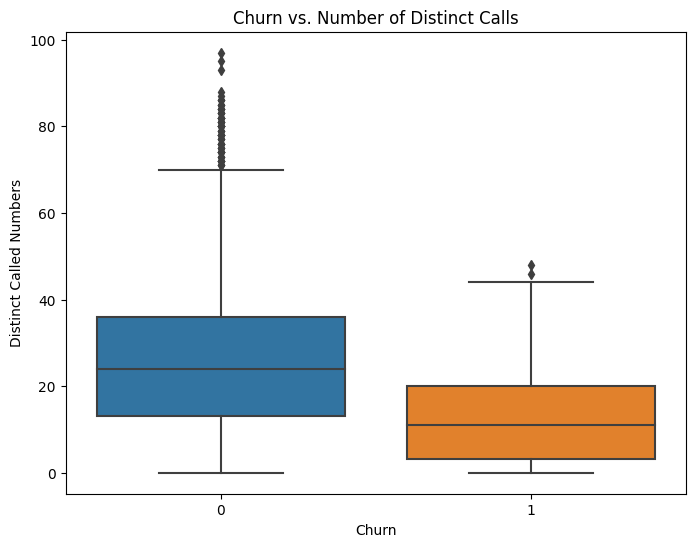

In [ ]:
# Explore the association between churn and the total number of distinct phone calls made by the customer.
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Churn', y='Distinct_Called_Numbers')
plt.title("Churn vs. Number of Distinct Calls")
plt.xlabel("Churn")
plt.ylabel("Distinct Called Numbers")
plt.show()

The boxplot for churned (Churn=1) customers shows a lower median and a narrower interquartile range compared to non-churned (Churn=0) customers. This indicates that churned customers generally have fewer distinct phone calls made compared to non-churned customers. Additionally, there are relatively more outliers in the box plot for non-churned customers, suggesting that some non-churned customers have a significantly higher number of distinct calls.

In [ ]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1_distinct_called_numbers = df['Distinct_Called_Numbers'].quantile(0.25)
Q3_distinct_called_numbers = df['Distinct_Called_Numbers'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR_distinct_called_numbers = Q3_distinct_called_numbers - Q1_distinct_called_numbers

# Calculate the lower and upper bounds for outliers
lower_bound_distinct_called_numbers = Q1_distinct_called_numbers - 1.5 * IQR_distinct_called_numbers
upper_bound_distinct_called_numbers = Q3_distinct_called_numbers + 1.5 * IQR_distinct_called_numbers

# Identify outliers based on the bounds
outliers_distinct_called_numbers = df[(df['Distinct_Called_Numbers'] < lower_bound_distinct_called_numbers) | (df['Distinct_Called_Numbers'] > upper_bound_distinct_called_numbers)]

# Get the number of outliers
num_outliers_distinct_called_numbers = len(outliers_distinct_called_numbers)

# Print the number of outliers
print("Number of outliers in 'Distinct_Called_Numbers':", num_outliers_distinct_called_numbers)

Number of outliers in 'Distinct_Called_Numbers': 82


In [ ]:
# Calculate the percentage of outliers in 'Distinct_Called_Numbers'
percentage_outliers_distinct_called_numbers = (num_outliers_distinct_called_numbers / len(df['Distinct_Called_Numbers'])) * 100

print("Percentage of outliers in 'Distinct_Called_Numbers':", round(percentage_outliers_distinct_called_numbers, 2), "%")

Percentage of outliers in 'Distinct_Called_Numbers': 2.88 %


In [ ]:
# Calculate summary statistics for Distinct_Called_Numbers in Churned Customers
churned_distinct_called_numbers_mean = df[df['Churn'] == 1]['Distinct_Called_Numbers'].mean()
churned_distinct_called_numbers_median = df[df['Churn'] == 1]['Distinct_Called_Numbers'].median()

# Calculate summary statistics for Distinct_Called_Numbers in Non-Churned Customers
non_churned_distinct_called_numbers_mean = df[df['Churn'] == 0]['Distinct_Called_Numbers'].mean()
non_churned_distinct_called_numbers_median = df[df['Churn'] == 0]['Distinct_Called_Numbers'].median()

# Print the results
print("Summary Statistics for Distinct_Called_Numbers in Churned Customers:")
print("Mean:", churned_distinct_called_numbers_mean)
print("Median:", churned_distinct_called_numbers_median)

print("\nSummary Statistics for Distinct_Called_Numbers in Non-Churned Customers:")
print("Mean:", non_churned_distinct_called_numbers_mean)
print("Median:", non_churned_distinct_called_numbers_median)

Summary Statistics for Distinct_Called_Numbers in Churned Customers:
Mean: 13.080717488789238
Median: 11.0

Summary Statistics for Distinct_Called_Numbers in Non-Churned Customers:
Mean: 25.872296173044926
Median: 24.0


In [ ]:
# Split the 'Distinct_Called_Numbers' data into two groups based on 'Churn'
churned_distinct_called_numbers = df[df['Churn'] == 1]['Distinct_Called_Numbers']
non_churned_distinct_called_numbers = df[df['Churn'] == 0]['Distinct_Called_Numbers']

# Perform Mann-Whitney U test
mannwhitney_result = mannwhitneyu(churned_distinct_called_numbers, non_churned_distinct_called_numbers)

print("\nMann-Whitney U Test Results:")
print("Test Statistic:", mannwhitney_result.statistic)
print("p-value:", mannwhitney_result.pvalue)


Mann-Whitney U Test Results:
Test Statistic: 288388.0
p-value: 2.4134103670814116e-54


In [ ]:
# Calculate the correlation between 'Distinct_Called_Numbers' and 'Churn'
correlation_result = df['Distinct_Called_Numbers'].corr(df['Churn'])

print("\nCorrelation between 'Distinct_Called_Numbers' and 'Churn':", correlation_result)


Correlation between 'Distinct_Called_Numbers' and 'Churn': -0.2703429425500555


Combining all the above results we can observe:

- The mean and median number of distinct phone calls made by churned customers are lower compared to non-churned customers.
- The Mann-Whitney U test p-value is extremely small, suggesting a significant difference in the 'Distinct_Called_Numbers' attribute between churned and non-churned customers.
- The negative correlation coefficient (-0.27) indicates a weak negative correlation between the number of distinct phone calls and churn. This suggests that as the number of distinct calls increases, the likelihood of churn decreases, though weakly.

Overall, this information provides insights into how the number of distinct phone calls relates to churn and suggests that customers with fewer distinct calls are more likely to churn.

### 4.2.9 Churn vs. Age Group

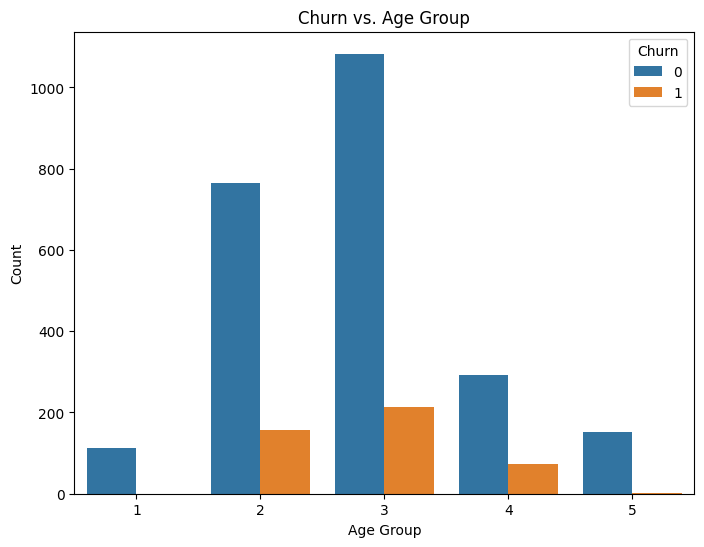

In [ ]:
# Analyze how churn differs based on the customer's age group.
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Age_Group', hue='Churn')
plt.title("Churn vs. Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

Here, we have 5 age groups where we observe:
- Age Group 3 has the highest number of customers in both churned and non-churned groups, indicating it is the most populated age group.
- Among non-churned customers (Churn = 0), Age Group 3 has the highest count, suggesting that it has the most stable customer base.
- Among churned customers (Churn = 1), Age Group 3 still has the highest count, but the count is lower than the non-churned group, indicating that customers in this age group are more likely to churn compared to other age groups.
- Age Group 2 has the second-highest count of both churned and non-churned customers, suggesting it is the second most populated age group.
- Age Group 4 has a lower count compared to Age Group 2, but higher than Age Group 5, in both churned and non-churned groups.
- Age Group 1 has the lowest count among all age groups, indicating it has the fewest customers.

Based on the counts, it appears that Age Group 3 and Age Group 2 are the most significant age groups in terms of customer count, with Age Group 3 having the highest churn count, suggesting that this age group might require attention to reduce churn rates. Age Group 5 has the lowest churn count, indicating it is relatively more loyal compared to other age groups.

But we should search it a bit more in depth and find the percentage of churned inside each category to gather as much insights as we can.

In [ ]:
# Count of churned and non-churned customers in each age group
age_group_counts = df.groupby(['Churn', 'Age_Group']).size()

# Count of churned customers in each age group
churn_counts = age_group_counts.loc[1]

# Count of total customers in each age group
total_counts = age_group_counts.groupby(level=1).sum()

# Calculate the percentage of churn in each age group
churn_percentage = (churn_counts / total_counts) * 100

# Display the results
print("Percentage of Churn in Each Age Group:")
print(round(churn_percentage, 2))

Percentage of Churn in Each Age Group:
Age_Group
1      NaN
2    17.05
3    16.44
4    20.16
5     1.30
dtype: float64


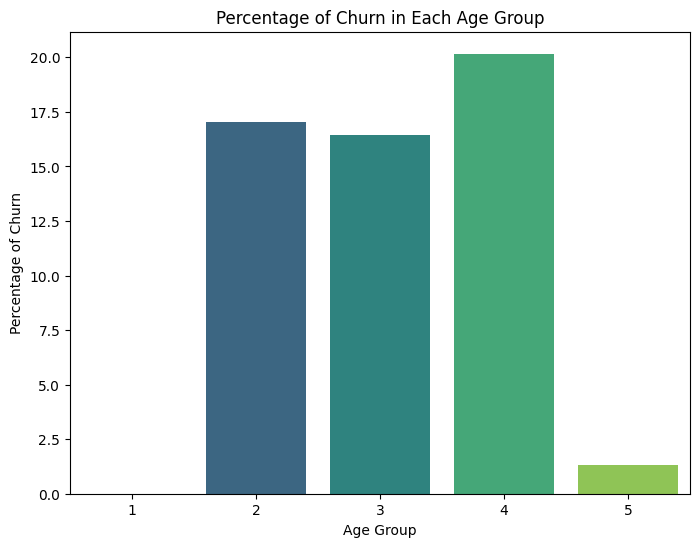

In [ ]:
# Create a DataFrame for plotting
data = pd.DataFrame({'Age_Group': churn_percentage.index, 'Percentage of Churn': churn_percentage.values})

# Plot the percentage of churn in each age group
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='Age_Group', y='Percentage of Churn', palette='viridis')
plt.title("Percentage of Churn in Each Age Group")
plt.xlabel("Age Group")
plt.ylabel("Percentage of Churn")
plt.show()

Observing further the percentage in each category of churned customers we notice that:
- Age Group 1: NaN - This means that there are no churned customers in Age Group 1 based on the available data.

- Age Group 2: 17.05% - Approximately 17.05% of customers in Age Group 2 have churned.

- Age Group 3: 16.44% - Approximately 16.44% of customers in Age Group 3 have churned.

- Age Group 4: 20.16% - Approximately 20.16% of customers in Age Group 4 have churned.

- Age Group 5: 1.30% - Approximately 1.30% of customers in Age Group 5 have churned.

Comparing these findings with the previous analysis, we can see that the highest percentage of churn is observed in Age Group 4 (20.16%), followed by Age Group 2 (17.05%) and Age Group 3 (16.44%). Age Group 5 has the lowest percentage of churn (1.30%). Additionally, Age Group 1 does not have any churned customers in the available data.

These results provide insights into how churn varies across different age groups, and Age Group 4 seems to have a relatively higher churn rate compared to the other groups.

Let's explore a bit more Age_Group and Churn across other variables of the dataset to gain more insights.

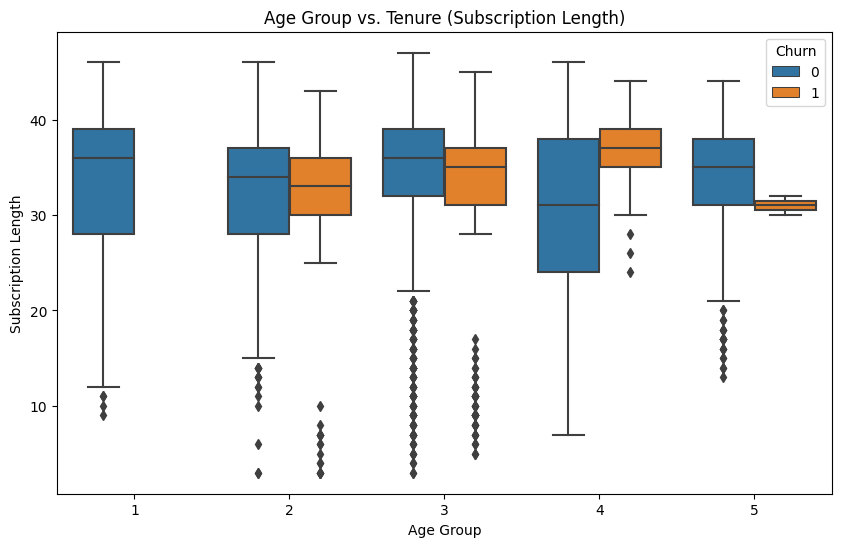

In [ ]:
# Box plot for Age Group vs. Tenure
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Age_Group', y='Subscription_Length', hue='Churn')
plt.title("Age Group vs. Tenure (Subscription Length)")
plt.xlabel("Age Group")
plt.ylabel("Subscription Length")
plt.legend(title="Churn")
plt.show()

In [ ]:
# Summary Statistics for Customer Value in Each Age Group
age_group_tenure_stats = df.groupby(['Age_Group', 'Churn'])['Subscription_Length'].describe()
age_group_tenure_stats

count       mean        std   min   25%   50%   75%   max
Age_Group Churn                                                            
1         0       112.0  31.714286  10.344889   9.0  28.0  36.0  39.0  46.0
2         0       764.0  31.841623   7.223073   3.0  28.0  34.0  37.0  46.0
          1       157.0  30.828025   9.291696   3.0  30.0  33.0  36.0  43.0
3         0      1083.0  33.821791   8.825826   3.0  32.0  36.0  39.0  47.0
          1       213.0  30.544601  10.999320   5.0  31.0  35.0  37.0  45.0
4         0       293.0  30.255973   9.253989   7.0  24.0  31.0  38.0  46.0
          1        74.0  36.797297   3.849852  24.0  35.0  37.0  39.0  44.0
5         0       152.0  32.809211   7.809600  13.0  31.0  35.0  38.0  44.0
          1         2.0  31.000000   1.414214  30.0  30.5  31.0  31.5  32.0

- Age Group 1: Most customers in this age group have a subscription length ranging from around 9 to 46 months. The highest number of customers falls into the 39-month subscription lengths.
- Age Group 2: The majority of customers in this age group have subscription lengths from around 3 to 46 months. The highest number of customers falls into the 36 and 37-month subscription lengths.
- Age Group 3: Customers in this age group have subscription lengths ranging from around 3 to 47 months. The highest number of customers falls into the 37 and 39-month subscription lengths.
- Age Group 4: Most customers in this age group have subscription lengths between 7 to 46 months. The highest number of customers falls into the 38 and 39-month subscription lengths.
- Age Group 5: Customers in this age group tend to have subscription lengths ranging from 13 to 44 months. The highest number of customers falls into the 31 and 38-month subscription lengths.

In [ ]:
# Summary Statistics for Tenure in Each Age Group
tenure_by_age_group = df.groupby('Age_Group')['Subscription_Length'].agg(['mean', 'median', 'std'])
print(round(tenure_by_age_group, 2))

            mean  median    std
Age_Group                      
1          31.71    36.0  10.34
2          31.67    34.0   7.62
3          33.28    36.0   9.29
4          31.57    33.0   8.84
5          32.79    35.0   7.76


From the plot and summary statistics, we can observe that there are differences in subscription lengths among different age groups. However, it's essential to note that the differences are not very substantial. The median subscription length for all age groups falls in the 33-36 months range, with some variations in the means and standard deviations. Therefore, we can conclude that the subscription lengths are relatively similar across age groups and might not be a strong differentiator for churn prediction.

Let's explore now Customer Value in the same framework.

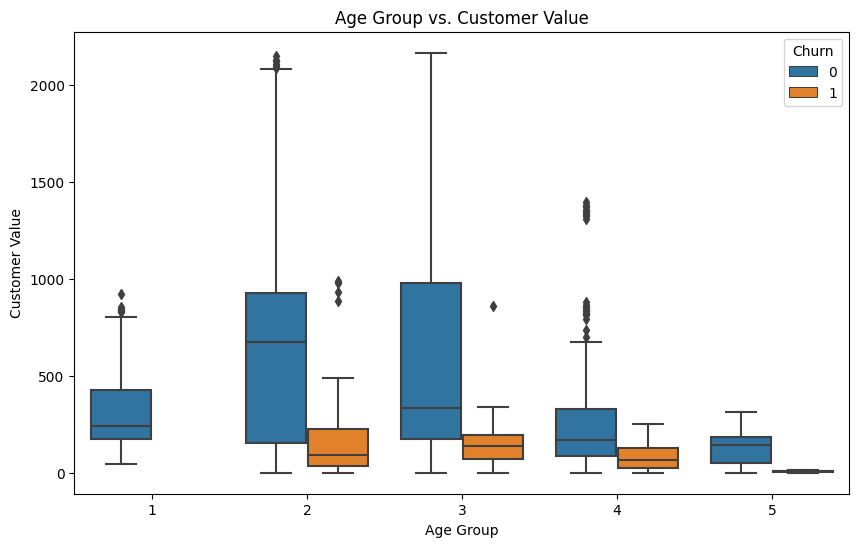

In [ ]:
# Box plot for Age Group vs. Customer Value
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Age_Group', y='Customer_Value', hue='Churn')
plt.title("Age Group vs. Customer Value")
plt.xlabel("Age Group")
plt.ylabel("Customer Value")
plt.legend(title="Churn")
plt.show()

In [ ]:
# Summary Statistics for Customer Value in Each Age Group
age_group_customer_value_stats = df.groupby(['Age_Group', 'Churn'])['Customer_Value'].describe()
age_group_customer_value_stats

count        mean         std     min        25%       50%  \
Age_Group Churn                                                                
1         0       112.0  342.385804  238.925501  45.375  175.13375  242.7700   
2         0       764.0  647.618855  569.135968   0.000  154.04625  673.1100   
          1       157.0  149.510924  179.405649   0.000   36.00000   91.7550   
3         0      1083.0  618.321625  559.821245   0.000  173.24000  333.8000   
          1       213.0  137.910235   96.377743   0.000   68.36000  136.0800   
4         0       293.0  244.938311  261.506392   0.000   87.90000  166.4000   
          1        74.0   82.258108   71.095256   0.000   25.27500   63.6500   
5         0       152.0  133.124507   86.795297   0.000   48.27750  142.0725   
          1         2.0    7.582500   10.723274   0.000    3.79125    7.5825   

                       75%       max  
Age_Group Churn                       
1         0      428.17500   920.315  
2         0      925.02000  2148.030  
          1      224.77500   987.255  
3         0      977.38000  2165.280  
          1      196.04000   858.280  
4         0      327.07500  1393.850  
          1      128.90000   251.100  
5         0      186.14625   311.040  
          1       11.37375    15.165

- Age Group 1 has only non-churned customers (112). The mean customer value for the non-churned customers in this age group is approximately 342.39.

- Age Group 2 has 764 non-churned customers and 157 churned customers. The mean customer value for non-churned customers in this age group is approximately 647.62, and for churned customers, it is approximately 149.51.

- Age Group 3 has 1083 non-churned customers and 213 churned customers. The mean customer value for non-churned customers in this age group is approximately 618.32, and for churned customers, it is approximately 137.91.

- Age Group 4 has 293 non-churned customers and 74 churned customers. The mean customer value for non-churned customers in this age group is approximately 244.94, and for churned customers, it is approximately 82.25.

- Age Group 5 has 152 non-churned customers and 2 churned customers. The mean customer value for non-churned customers in this age group is approximately 133.12, and for churned customers, it is approximately 7.58.

The box plot and summary statistics reveal that Age Group 2 has the highest mean customer value, indicating that customers in this age group, who do not churn, have higher customer values on average compared to other age groups. Age Group 3 also shows a relatively high mean customer value, while Age Group 5 has the lowest mean customer value. Age Group 4 has a moderate mean customer value, and Age Group 1, being the youngest group, has a higher mean customer value but consists only of non-churned customers.

In [ ]:
# Count of Complaints by Age Group
complaints_by_age_group = df.groupby(['Age_Group', 'Churn'])['Complains'].sum().unstack(fill_value=0)
print(complaints_by_age_group)

Churn       0    1
Age_Group         
1           1    0
2           8   59
3          23  104
4           2   26
5           6    1


<Figure size 1200x1000 with 0 Axes>

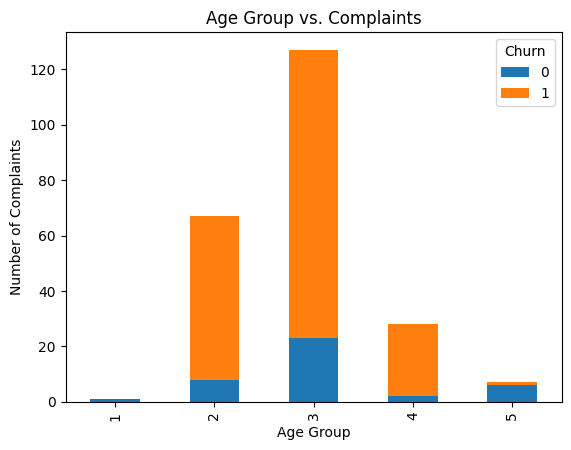

In [ ]:
# Bar plot for Age Group vs. Complaints
plt.figure(figsize=(12, 10))
complaints_by_age_group.plot(kind='bar', stacked=True)
plt.title("Age Group vs. Complaints")
plt.xlabel("Age Group")
plt.ylabel("Number of Complaints")
plt.legend(title="Churn")
plt.show()

Here, we have the number of complaints received for each age group, divided by churn status. Here are the findings:

- Age Group 1 has 1 complaint, and it is from a non-churned customer.
- Age Group 2 has 67 complaints, out of which 59 are from churned customers and 8 are from non-churned customers.
- Age Group 3 has 127 complaints, out of which 104 are from churned customers and 23 are from non-churned customers.
- Age Group 4 has 28 complaints, out of which 26 are from churned customers and 2 are from non-churned customers.
- Age Group 5 has 7 complaints, out of which 1 is from churned customer and 6 are from non-churned customers.

So, the percentage of churned customers with complaints in each age group is as follows:

- Age Group 1: 0%
- Age Group 2: ~88.06%
- Age Group 3: ~81.88%
- Age Group 4: ~92.86%
- Age Group 5: ~14.29%

These percentages provide insights into the proportion of churned customers within each age group based on their complaints. Age Group 4 has the highest percentage of churned customers, followed by Age Group 2 and Age Group 3. Age Group 1 and Age Group 5 have the lowest percentage of churned customers, indicating relatively higher customer retention rates in these age groups.

Overall, Age Groups 3, 4 and 2 have the highest percentages of customers with complaints, with churned customers showing higher complaint rates than non-churned customers. Age Group 5 has a relatively high percentage of non-churned customers with complaints compared to other age groups, while the percentage of churned customers with complaints in this age group is quite low.

Now, let's dive into the customer habits a bit deeper to understand them better.

In [ ]:
# Summary Statistics for Usage Patterns in Each Age Group
usage_patterns_by_age_group = df.groupby('Age_Group')['Seconds_of_Use', 'Frequency_of_use', 'Frequency_of_SMS'].describe()
print(usage_patterns_by_age_group)

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


          Seconds_of_Use                                                    \
                   count         mean          std    min      25%     50%   
Age_Group                                                                    
1                  112.0  4019.160714  1532.392733  805.0  2539.25  4128.0   
2                  921.0  4686.384365  4837.419992    0.0  1070.00  2878.0   
3                 1296.0  4468.734568  3900.590287    0.0  1933.00  3095.0   
4                  367.0  4035.929155  3930.435233    0.0   980.50  2153.0   
5                  154.0  5737.798701  4226.000148    0.0   774.25  6970.0   

                            Frequency_of_use             ...                 \
               75%      max            count       mean  ...     75%    max   
Age_Group                                                ...                  
1          4956.75   6797.0            112.0  77.464286  ...   82.00  146.0   
2          6573.00  17090.0            921.0  74.479913  ..

These summary statistics provide insights into the usage patterns of customers in each age group, including the average usage time and frequency of phone calls and SMS messages. The data shows variability in usage patterns across different age groups.

- Age Group 1: This age group has 112 customers. On average, customers in this age group use their phones for approximately 4019.16 seconds (about 1 hour and 12 minutes) with a standard deviation of 1532.39 seconds. The average frequency of phone usage is approximately 77.46 times, with a minimum of 21 and a maximum of 146. The average frequency of SMS usage is approximately 21.29 times, with a minimum of 0 and a maximum of 99.

- Age Group 2: This age group has 921 customers. On average, customers in this age group use their phones for approximately 4686.38 seconds (about 1 hour and 30 minutes) with a high standard deviation of 4837.42 seconds, indicating significant variability in phone usage. The average frequency of phone usage is approximately 74.48 times, with a minimum of 0 and a maximum of 255. The average frequency of SMS usage is approximately 77.44 times, with a minimum of 0 and a maximum of 398.

- Age Group 3: This age group has 1296 customers. On average, customers in this age group use their phones for approximately 4468.73 seconds (about 1 hour and 24 minutes) with a standard deviation of 3900.59 seconds. The average frequency of phone usage is approximately 68.63 times, with a minimum of 0 and a maximum of 242. The average frequency of SMS usage is approximately 89.47 times, with a minimum of 0 and a maximum of 508.

- Age Group 4: This age group has 367 customers. On average, customers in this age group use their phones for approximately 4035.93 seconds (about 1 hour and 12 minutes) with a standard deviation of 3930.44 seconds. The average frequency of phone usage is approximately 60.69 times, with a minimum of 0 and a maximum of 179. The average frequency of SMS usage is approximately 43.89 times, with a minimum of 0 and a maximum of 522.

- Age Group 5: This age group has 154 customers. On average, customers in this age group use their phones for approximately 5737.80 seconds (about 1 hour and 59 minutes) with a standard deviation of 4226.00 seconds. The average frequency of phone usage is approximately 80.42 times, with a minimum of 0 and a maximum of 188. The average frequency of SMS usage is approximately 29.48 times, with a minimum of 0 and a maximum of 112.

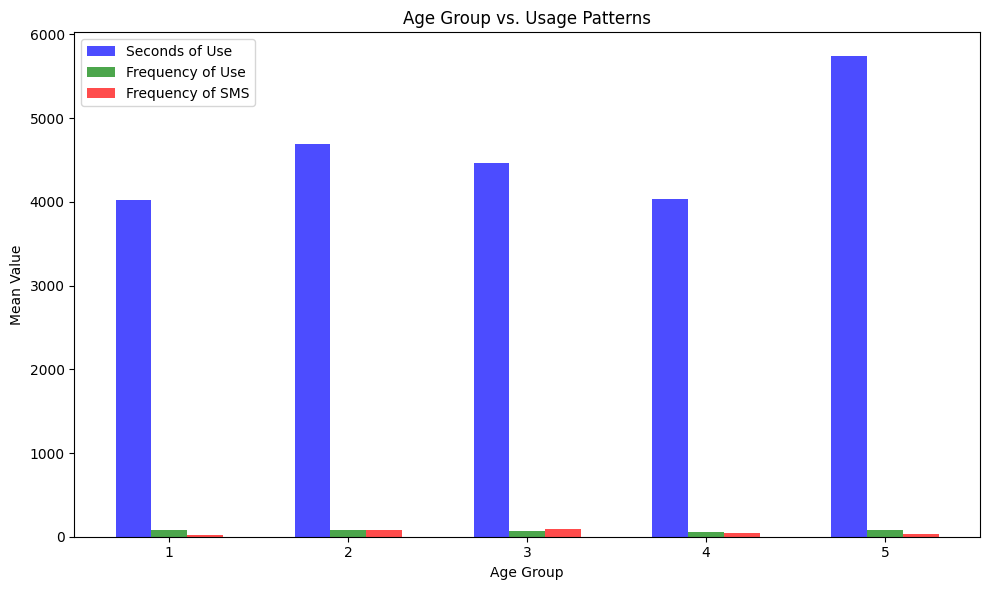

In [ ]:
# Bar plot for Age Group vs. Usage Patterns
plt.figure(figsize=(10, 6))
bar_width = 0.2

# Positions of the bars on the x-axis
bar_positions = np.arange(len(usage_patterns_by_age_group.index))

plt.bar(bar_positions - bar_width, usage_patterns_by_age_group['Seconds_of_Use']['mean'], width=bar_width, alpha=0.7, label='Seconds of Use', color='b')
plt.bar(bar_positions, usage_patterns_by_age_group['Frequency_of_use']['mean'], width=bar_width, alpha=0.7, label='Frequency of Use', color='g')
plt.bar(bar_positions + bar_width, usage_patterns_by_age_group['Frequency_of_SMS']['mean'], width=bar_width, alpha=0.7, label='Frequency of SMS', color='r')

plt.title("Age Group vs. Usage Patterns")
plt.xlabel("Age Group")
plt.ylabel("Mean Value")
plt.xticks(bar_positions, usage_patterns_by_age_group.index)
plt.legend()
plt.tight_layout()
plt.show()

Let's proceed with the Chi-square test of independence. The null hypothesis for the Chi-square test of independence is that there is no association between the two variables (i.e., "Churn" and "Age_Group"). If the p-value is less than a chosen significance level (0.05), we reject the null hypothesis, indicating that there is a significant association between churn and age group.

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df['Churn'], df['Age_Group'])

# Perform the Chi-square test of independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square test statistic:", chi2)
print("P-value:", p_value)

Chi-square test statistic: 52.43956100292363
P-value: 1.1162941023359004e-10


The results indicate that there is a significant association between churn and age group (p-value < 0.05). This suggests that the proportion of churned customers varies significantly across different age groups.

### 4.2.10 Churn vs. Tariff Plan

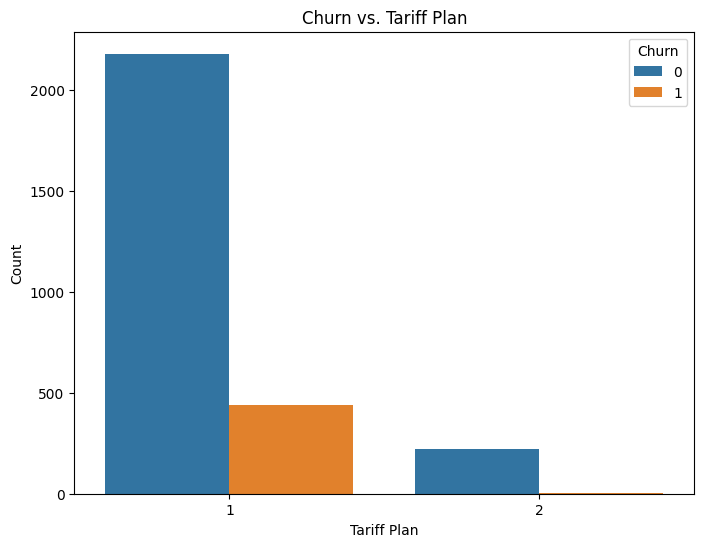

In [ ]:
# Investigate how churn is related to the binary attribute indicating the type of service (Tariff Plan).
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Tariff_Plan', hue='Churn')
plt.title("Churn vs. Tariff Plan")
plt.xlabel("Tariff Plan")
plt.ylabel("Count")
plt.show()

In [ ]:
# Let's understand also the numbers
churn_tariff_count = df.groupby(['Churn'])['Tariff_Plan'].value_counts()
churn_tariff_count

Churn  Tariff_Plan
0      1              2181
       2               223
1      1               440
       2                 6
Name: Tariff_Plan, dtype: int64

- For Tariff Plan 1, there are 2181 non-churned customers and 440 churned customers.
- For Tariff Plan 2, there are 223 non-churned customers and 6 churned customers.

In [ ]:
# Calculate the churn rates for each tariff plan
tariff_plan_counts = df.groupby(['Tariff_Plan', 'Churn']).size().unstack(fill_value=0)
tariff_plan_churn_rate = (tariff_plan_counts[1] / (tariff_plan_counts[0] + tariff_plan_counts[1])) * 100
print(round(tariff_plan_churn_rate, 2))

Tariff_Plan
1    16.79
2     2.62
dtype: float64


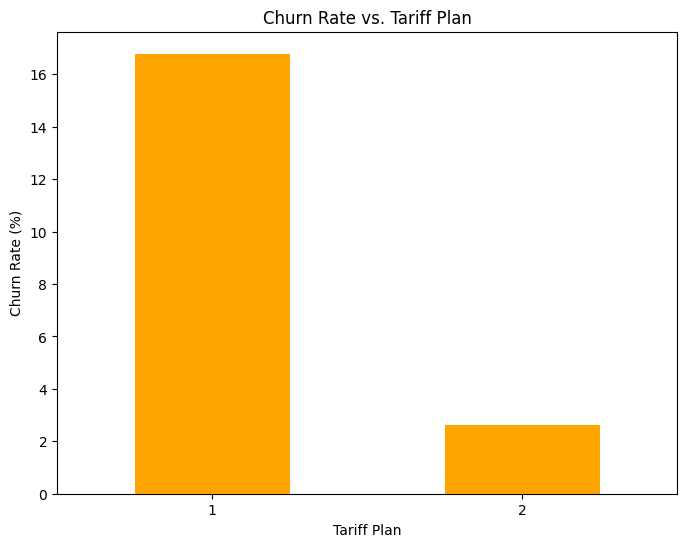

In [ ]:
# Plot the churn rates for each tariff plan
plt.figure(figsize=(8, 6))
tariff_plan_churn_rate.plot(kind='bar', color='orange')
plt.title("Churn Rate vs. Tariff Plan")
plt.xlabel("Tariff Plan")
plt.ylabel("Churn Rate (%)")
plt.xticks(rotation=0)
plt.show()

- Tariff Plan 1 has a higher churn rate of approximately 16.79%. This means that around 16.79% of the customers with Tariff Plan 1(Pay as you go) have discontinued their services or switched to another provider.

- Tariff Plan 2, on the other hand, has a lower churn rate of approximately 2.62%. This indicates that only about 2.62% of the customers with Tariff Plan 2 (Contractual) have churned.

The significant difference in churn rates between the two tariff plans suggests that the type of service plan plays a role in customer retention. Customers with Tariff Plan 1 are more likely to churn compared to those with Tariff Plan 2.

To gain more insights into the relationship between churn and the tariff plan, we can perform a Chi-square test of independence. This test will help us determine whether there is a statistically significant association between the two categorical variables: "Churn" and "Tariff_Plan."

The null hypothesis (H0) for the Chi-square test is that there is no association between the two variables. The alternative hypothesis (Ha) is that there is a significant association between them.

In [ ]:
# Create a contingency table for Churn vs. Tariff_Plan
contingency_table = pd.crosstab(df['Churn'], df['Tariff_Plan'])

# Perform the Chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the Chi-square test statistic and p-value
print("Chi-square test statistic:", chi2)
print("P-value:", p_value)

Chi-square test statistic: 30.95844174655926
P-value: 2.6361297947004973e-08


With a p-value of approximately 2.64e-08 (which is very small), we can reject the null hypothesis (H0) and conclude that there is a statistically significant association between churn and the tariff plan. In other words, the type of service (Pay as you go or Contractual) is related to whether a customer churns or not.

It is evident that customers with a Pay as you go plan are more likely to churn compared to customers with a Contractual plan. This information can be valuable for the company to understand the churn behavior and make targeted strategies to retain customers with different tariff plans.

### 4.2.11 Churn vs. Status

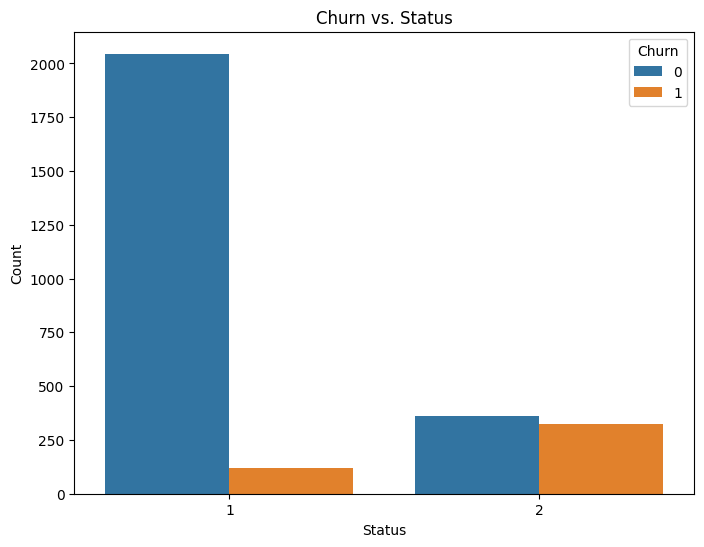

In [ ]:
# Explore the relationship between churn and the binary attribute indicating the customer's status.
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Status', hue='Churn')
plt.title("Churn vs. Status")
plt.xlabel("Status")
plt.ylabel("Count")
plt.show()

In [ ]:
# Examine the numbers of each bar
churn_status_count = df.groupby(['Churn'])['Status'].value_counts()
churn_status_count

Churn  Status
0      1         2045
       2          359
1      2          325
       1          121
Name: Status, dtype: int64

- Among the customers who are currently active (Status 1), 121 of them have churned (Churn 1), while 2045 are non-churned (Churn 0).
- Among the customers who are non-active (Status 2), 325 of them have churned (Churn 1), while 359 are non-churned (Churn 0).

The data indicates that a higher proportion of churned customers are among those who are non-active (Status 2) compared to those who are active (Status 1).

In [ ]:
# Calculate the total number of customers in each status category
total_customers_status = df['Status'].value_counts()

# Calculate the number of churned customers in each status category
churned_customers_status = df[df['Churn'] == 1]['Status'].value_counts()

# Calculate the percentage of churned customers in each status category
percentage_churned_status = (churned_customers_status / total_customers_status) * 100
print("Percentage of churned customers in each status category:")
print(round(percentage_churned_status, 2))

Percentage of churned customers in each status category:
1     5.59
2    47.51
Name: Status, dtype: float64


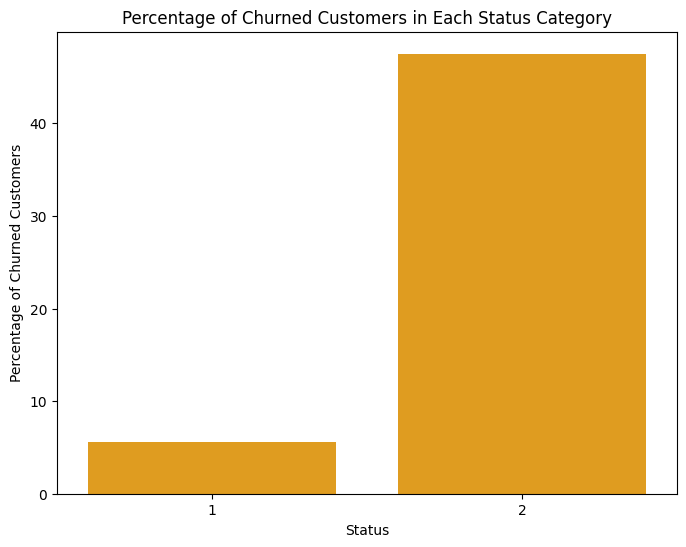

In [ ]:
# Visualize the percentage of churned customers in each status category using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=percentage_churned_status.index, y=percentage_churned_status.values, color='orange')
plt.title("Percentage of Churned Customers in Each Status Category")
plt.xlabel("Status")
plt.ylabel("Percentage of Churned Customers")
plt.show()

Let's perform a Chi-square test of independence. The null hypothesis (H0) for the Chi-square test is that there is no association between the two variables. The alternative hypothesis (Ha) is that there is a significant association between them.

In [ ]:
# Create a contingency table for churn and status
contingency_table = pd.crosstab(df['Churn'], df['Status'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square test statistic:", chi2)
print("P-value:", p)

Chi-square test statistic: 689.1431939387269
P-value: 6.8645838862667365e-152


The Chi-square test statistic is approximately 689.14, and the p-value is extremely small (6.86e-152). This indicates a highly significant relationship between churn and customer status. The low p-value suggests that the association between churn and customer status is not due to chance, and there is strong evidence to support the hypothesis that churn behavior is related to the customer's status.

Furthermore, the percentage of churned customers in the active status (Status 1) is approximately 5.59%, while the percentage of churned customers in the non-active status (Status 2) is significantly higher, approximately 47.51%. This substantial difference in churn rates between active and non-active customers highlights the importance of customer status in predicting churn behavior.

### 4.2.12 Churn vs. Age

Since we have already performed a comprehensive analysis on the relationship between churn and age groups, we can now focus on analyzing the 'Age' column independently.

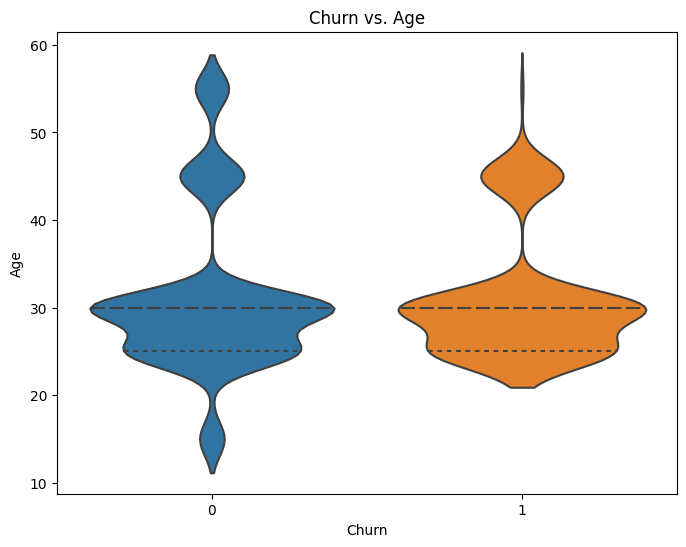

In [ ]:
# Analyze the correlation between churn and the age of the customer.
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='Churn', y='Age', inner='quartile')
plt.title("Churn vs. Age")
plt.xlabel("Churn")
plt.ylabel("Age")
plt.show()

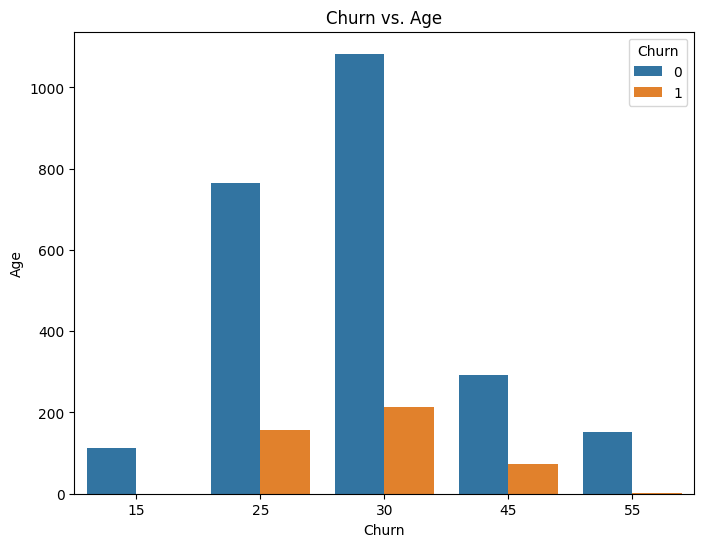

In [ ]:
# Let's visualize it also in a countplot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Age', hue='Churn')
plt.title("Churn vs. Age")
plt.xlabel("Churn")
plt.ylabel("Age")
plt.show()

In [ ]:
# Examine numbers of each bar
churn_age_count = df.groupby(['Churn'])['Age'].value_counts()
churn_age_count

Churn  Age
0      30     1083
       25      764
       45      293
       55      152
       15      112
1      30      213
       25      157
       45       74
       55        2
Name: Age, dtype: int64

The wider part of the violin plot represents the interquartile range (IQR), and the narrower part represents the higher density region.
- For churned customers (Churn = 1), the distribution is narrower, indicating that there is less variation in age among churned customers.
- For non-churned customers (Churn = 0), the distribution is wider, indicating a wider age range among non-churned customers.
- Age 30 has the highest number of both churned and non-churned customers.
- Age 55 has the lowest number of churned customers (only 2), which suggests that older customers are less likely to churn.
- The count of churned customers seems relatively lower in the age group 45 compared to the surrounding age groups.

In [ ]:
# Summary statistics for Age in churned customers
age_churned_mean = df[df['Churn'] == 1]['Age'].mean()
age_churned_median = df[df['Churn'] == 1]['Age'].median()

# Summary statistics for Age in non-churned customers
age_non_churned_mean = df[df['Churn'] == 0]['Age'].mean()
age_non_churned_median = df[df['Churn'] == 0]['Age'].median()

print("Summary Statistics for Age in Churned Customers:")
print("Mean:", age_churned_mean)
print("Median:", age_churned_median)
print("\nSummary Statistics for Age in Non-Churned Customers:")
print("Mean:", age_non_churned_mean)
print("Median:", age_non_churned_median)

Summary Statistics for Age in Churned Customers:
Mean: 30.840807174887892
Median: 30.0

Summary Statistics for Age in Non-Churned Customers:
Mean: 31.121048252911812
Median: 30.0


- The mean age of churned customers is approximately 30.84 years, and the median age is 30 years.
- The mean age of non-churned customers is approximately 31.12 years, and the median age is 30 years.

The small difference in mean and median age between churned and non-churned customers suggests that age might not be a strong predictor of churn in this dataset.

Next, we can perform a statistical significance test to validate the correlation. We will use a hypothesis test to determine whether the correlation is significant or just due to random chance. We will use the Pearson correlation significance test, which tests the null hypothesis that there is no correlation between the variables.

In [ ]:
# Perform the Pearson correlation significance test
correlation, p_value = pearsonr(df['Age'], df['Churn'])

print("Pearson correlation coefficient:", correlation)
print("P-value:", p_value)

Pearson correlation coefficient: -0.011491303113936
P-value: 0.539731649743082


The correlation coefficient is very close to zero, indicating a very weak correlation between churn and age. Additionally, the p-value is greater than 0.05, which means that the correlation is not statistically significant.

In other words, there is no strong linear relationship between the age of the customer and their likelihood to churn. Age does not appear to be a significant factor influencing churn behavior in this dataset.

Next, we will calculate the correlation between 'Age' and the other attributes and visualize it using a bar plot. This provides valuable insights into how 'Age' is related to other features in the dataset.

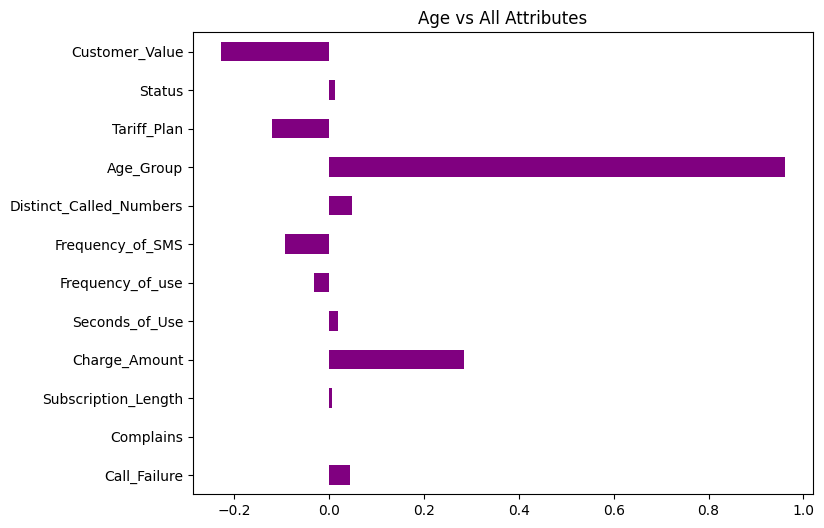

In [ ]:
# Feature importance on Age vs the rest of the attributes
corr_age = df.drop(['Churn','Age'] , axis=1).corrwith(df['Age']).plot(kind='barh', figsize=(8, 6), color='purple', title="Age vs All Attributes")

- 'Age_Group' has a very high positive correlation (approximately 0.96) with 'Age'. This high correlation is expected since 'Age_Group' is derived from 'Age' and represents age groups based on certain criteria.

- 'Charge_Amount' shows a positive correlation (approximately 0.28) with 'Age'. It suggests that older customers tend to have higher charge amounts, although the correlation is not very strong.

- 'Customer_Value' exhibits a negative correlation (approximately -0.23) with 'Age'. This indicates that younger customers might have higher customer value, although the correlation is not significant.

- 'Tariff_Plan' has a negative correlation (approximately -0.12) with 'Age'. It suggests that younger customers are more likely to have the 'Tariff_Plan' value of 1 (Pay as you go), while older customers might lean towards the 'Tariff_Plan' value of 2 (Contractual).

- The rest of the attributes, such as 'Frequency_of_SMS', 'Distinct_Called_Numbers', 'Call_Failure', 'Frequency_of_use', 'Seconds_of_Use', 'Status', 'Subscription_Length', and 'Complains', have very weak correlations with 'Age', as indicated by the absolute correlation values close to zero.

Overall, the analysis reveals that 'Age' is most strongly correlated with 'Age_Group', which is expected, as 'Age_Group' is derived from 'Age'. Other attributes show relatively weak correlations with 'Age', suggesting that 'Age' might not be a primary driver of churn or other behaviors in the dataset.

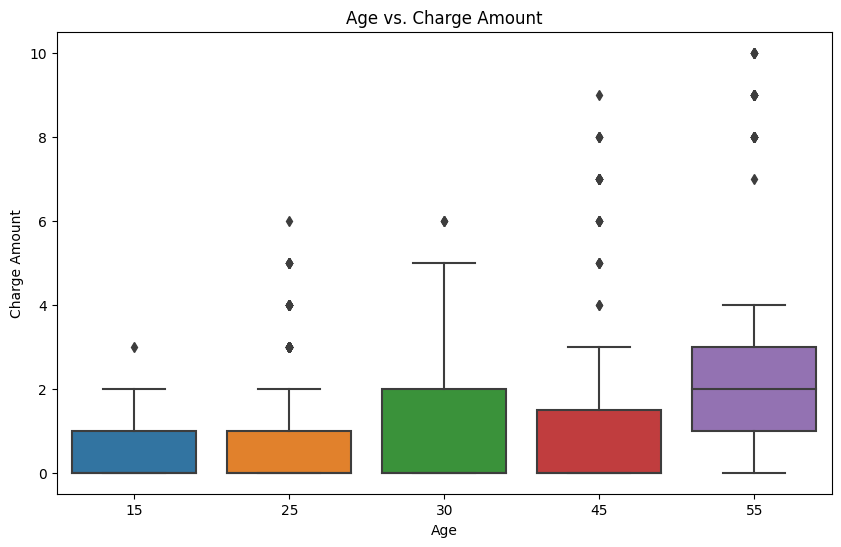

In [ ]:
# Visualize the relationship between the 'Age' and 'Charge_Amount
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Age', y='Charge_Amount')
plt.title("Age vs. Charge Amount")
plt.xlabel("Age")
plt.ylabel("Charge Amount")
plt.show()

In [ ]:
# Let's see their statistical description
age_charge_stats = df.groupby(['Age'])['Charge_Amount'].describe()
age_charge_stats

count      mean       std  min  25%  50%  75%   max
Age                                                      
15    112.0  0.348214  0.653608  0.0  0.0  0.0  1.0   3.0
25    921.0  0.652552  1.082879  0.0  0.0  0.0  1.0   6.0
30   1296.0  0.984568  1.259310  0.0  0.0  0.0  2.0   6.0
45    367.0  1.054496  1.901186  0.0  0.0  0.0  1.5   9.0
55    154.0  3.084416  3.151825  0.0  1.0  2.0  3.0  10.0

- The mean charge amount tends to increase with age. The highest mean charge amount is observed in the age group 55, followed by age group 45.
- The distribution of charge amounts is positively skewed for all age groups, as indicated by the higher values of the 75th percentile compared to the median (50th percentile).
- The age group 55 has the highest variability in charge amounts, as evident from the wider interquartile range (IQR).

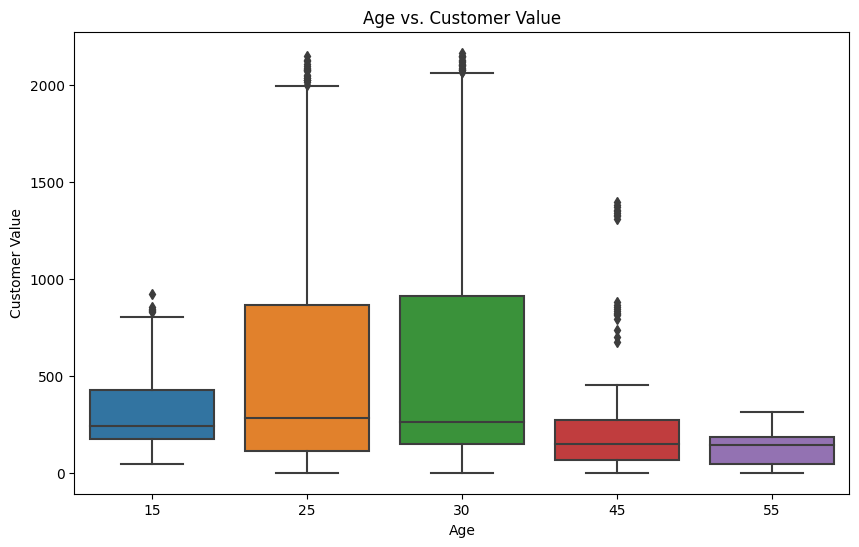

In [ ]:
# Visualize the relationship between the 'Age' and 'Customer_Value'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Age', y='Customer_Value')
plt.title("Age vs. Customer Value")
plt.xlabel("Age")
plt.ylabel("Customer Value")
plt.show()

In [ ]:
# Let's see their statistical description
age_cv_stats = df.groupby(['Age'])['Customer_Value'].describe()
age_cv_stats

count        mean         std     min        25%       50%       75%  \
Age                                                                          
15    112.0  342.385804  238.925501  45.375  175.13375  242.7700  428.1750   
25    921.0  562.707948  556.075161   0.000  110.83500  283.7700  865.8900   
30   1296.0  539.365123  543.226267   0.000  147.63000  261.8600  913.4800   
45    367.0  212.136308  244.620211   0.000   66.81250  146.2500  269.2625   
55    154.0  131.494091   87.401641   0.000   45.65625  140.5275  185.2350   

          max  
Age            
15    920.315  
25   2148.030  
30   2165.280  
45   1393.850  
55    311.040

- The mean customer value shows a increasing trend until age 30 and then declining trend until 55. The highest mean customer value is observed in the age group 30, followed by age group 25.
- The distribution of customer values is positively skewed for all age groups, with the age group 30 having the highest variability, as indicated by the wider IQR.
- Interestingly, the age group 55, despite having the highest mean charge amount, has a lower mean customer value compared to the age groups 25 and 30.

Overall, we can see some trends in the relationship between age and charge amount, as well as customer value. However, the correlations are weak, suggesting that age alone may not be a significant predictor of these attributes. Other factors may play a more substantial role in determining the charge amount and customer value.

### 4.2.13 Churn vs. Customer Value

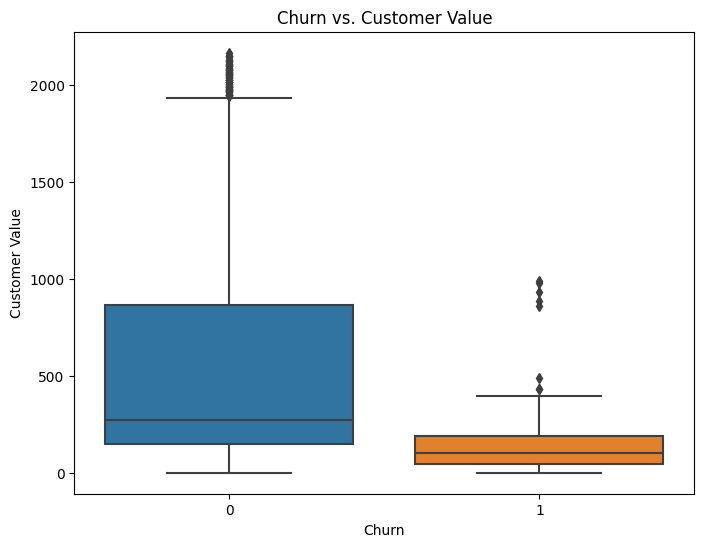

In [ ]:
# Examine how churn is associated with the calculated value of the customer.
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Churn', y='Customer_Value')
plt.title("Churn vs. Customer Value")
plt.xlabel("Churn")
plt.ylabel("Customer Value")
plt.show()

- The box plot shows that the median customer value for non-churned customers (Churn=0) is higher than that of churned customers (Churn=1). This indicates that, on average, non-churned customers tend to have higher customer values compared to churned customers.
- The interquartile range (IQR) for non-churned customers is also larger, indicating higher variability in customer values for non-churned customers.
- Churned customers have a wider spread of customer values, with some outliers having relatively higher customer values compared to non-churned customers.

In [ ]:
# Let's see their statistical description
churn_cv_stats = df.groupby(['Churn'])['Customer_Value'].describe()
churn_cv_stats

count        mean         std  min        25%      50%        75%  \
Churn                                                                       
0      2404.0  538.590759  533.607176  0.0  145.62875  271.540  862.59625   
1       446.0  132.175695  130.934347  0.0   45.49500  102.565  187.98000   

            max  
Churn            
0      2165.280  
1       987.255

- Non-churned customers have a mean customer value of approximately 538.59, with a standard deviation of 533.61.
- Churned customers have a mean customer value of approximately 132.18, with a standard deviation of 130.93.
- Both groups have a minimum customer value of 0.0, indicating some customers with zero or very low customer values.
- The 25th percentile for non-churned customers is around 145.63, while for churned customers, it is around 45.50. This indicates that a significant proportion of churned customers have lower customer values compared to non-churned customers.
- The median customer value for non-churned customers is 271.54, while for churned customers, it is 102.57. This further supports the observation that non-churned customers have higher customer values on average.
- The 75th percentile for non-churned customers is approximately 862.60, while for churned customers, it is around 187.98. This shows that the top 25% of non-churned customers have substantially higher customer values compared to churned customers.

All the above, indicate that non-churned customers tend to have higher customer values on average compared to churned customers. This suggests that customer value could be an essential factor in predicting churn, as it demonstrates a significant difference between churned and non-churned customers.

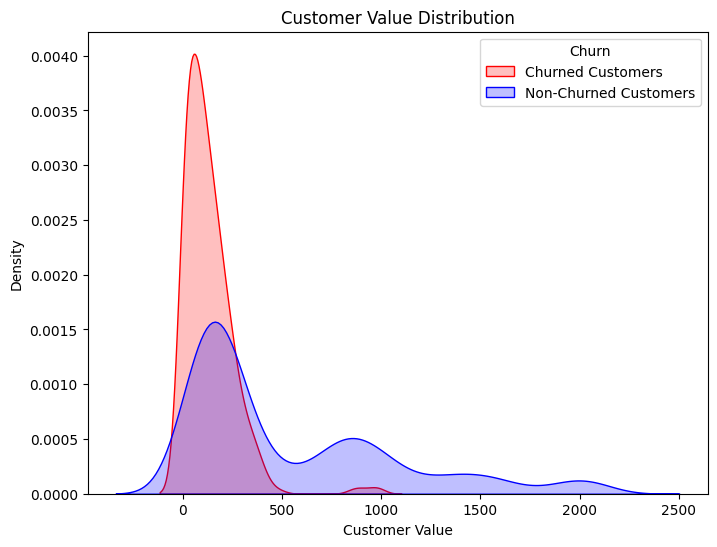

In [ ]:
# Filter the data for churned and non-churned customers
churned_customers = df[df['Churn'] == 1]
non_churned_customers = df[df['Churn'] == 0]

# Create the kernel density plot for customer values
plt.figure(figsize=(8, 6))
sns.kdeplot(data=churned_customers['Customer_Value'], label='Churned Customers', color='red', fill=True)
sns.kdeplot(data=non_churned_customers['Customer_Value'], label='Non-Churned Customers', color='blue', fill=True)

plt.title("Customer Value Distribution")
plt.xlabel("Customer Value")
plt.ylabel("Density")
plt.legend(title="Churn")
plt.show()

- Non-churned customers have a significantly higher mean "Customer Value" (538.59) compared to churned customers (132.18).
- The standard deviation for non-churned customers (533.61) is also higher than that of churned customers (130.93), indicating greater variability in the "Customer Value" for non-churned customers.
- Both groups have a minimum value of 0.0, indicating some customers with no "Customer Value" (possibly indicating they are not active or have low activity).
- The 25th percentile (Q1) for non-churned customers is 145.63, which means 25% of non-churned customers have "Customer Value" below this value. For churned customers, Q1 is 45.50, indicating a lower range of "Customer Value" compared to non-churned customers.
- The median (50th percentile, Q2) for non-churned customers is 271.54, while for churned customers, it is 102.57. This shows that the median "Customer Value" is higher for non-churned customers than for churned customers.
- The 75th percentile (Q3) for non-churned customers is 862.60, indicating that 75% of non-churned customers have "Customer Value" below this value. For churned customers, Q3 is 187.98, illustrating a lower range of "Customer Value" compared to non-churned customers.
- The maximum "Customer Value" for non-churned customers is 2165.28, while for churned customers, it is 987.25, indicating higher maximum values for non-churned customers.

Overall, the "Customer Value" for non-churned customers is higher and exhibits greater variability compared to churned customers, where "Customer Value" tends to be lower and more concentrated around lower values.

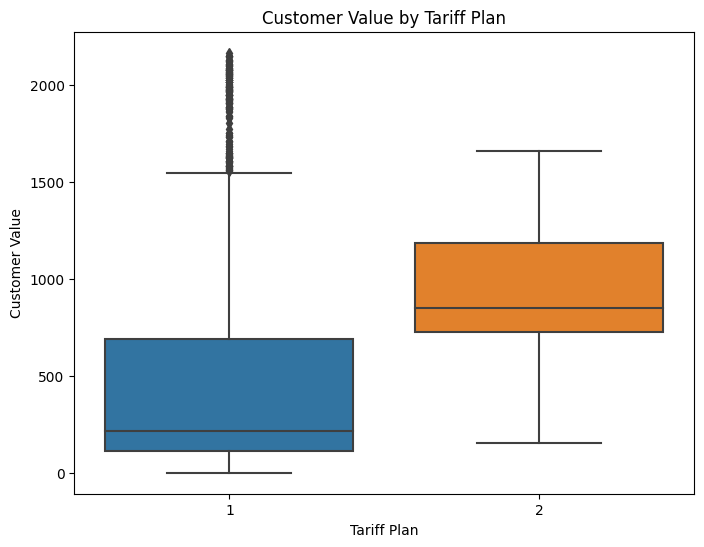

In [ ]:
# Examine how Tariff Plan is associated with the calculated value of the customer.
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Tariff_Plan', y='Customer_Value')
plt.title("Customer Value by Tariff Plan")
plt.xlabel("Tariff Plan")
plt.ylabel("Customer Value")
plt.show()

In [ ]:
# Summary Statistics for Customer Value in Tariff_Plan
tariff_cv_stats = df.groupby(['Tariff_Plan'])['Customer_Value'].describe()
tariff_cv_stats

count        mean         std      min     25%      50%  \
Tariff_Plan                                                             
1            2621.0  436.981637  506.543960    0.000  110.25  213.480   
2             229.0  910.016048  389.604951  155.055  725.22  849.645   

                  75%       max  
Tariff_Plan                      
1             687.735  2165.280  
2            1186.040  1660.095

The box plot reveals that customers with Tariff Plan 2 (Contractual) generally have higher "Customer Value" compared to those with Tariff Plan 1 (Pay as you go). Tariff Plan 2 shows a larger spread of values, with a higher median and upper quartile, suggesting that Contractual customers tend to have higher spending patterns compared to Pay as you go customers.

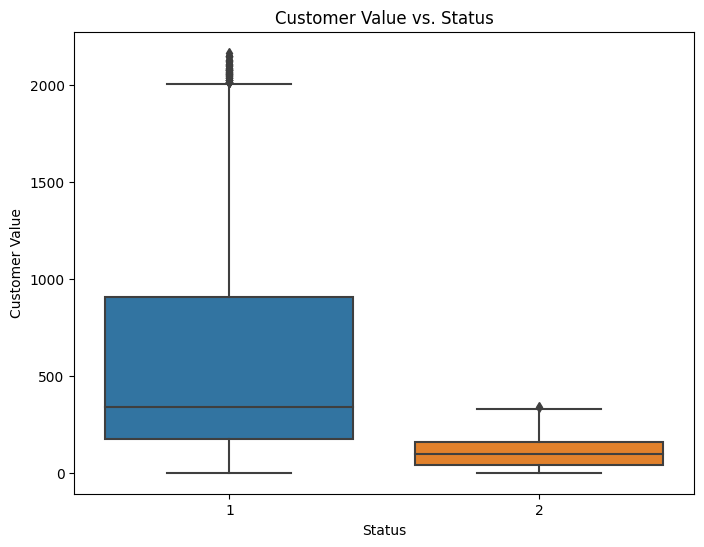

In [ ]:
# Examine how Status is associated with the calculated value of the customer.
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Status', y='Customer_Value')
plt.title("Customer Value vs. Status")
plt.xlabel("Status")
plt.ylabel("Customer Value")
plt.show()

In [ ]:
# Summary Statistics for Customer Value in Each Status
status_cv_stats = df.groupby(['Status'])['Customer_Value'].describe()
status_cv_stats

count        mean         std  min     25%       50%     75%      max
Status                                                                        
1       2166.0  591.637918  538.166781  0.0  171.30  336.9775  907.71  2165.28
2        684.0  105.606455   77.998262  0.0   40.44   95.7450  157.28   336.88

- For customers with Status 1 (Active), the mean customer value is approximately 591.64, with a standard deviation of around 538.17. The minimum customer value is 0, and the maximum is 2165.28.
- For customers with Status 2 (Non-active), the mean customer value is approximately 105.61, with a standard deviation of around 77.99. The minimum customer value is 0, and the maximum is 336.88.

Interpretation: Customers with Status 1 (Active) tend to have a higher mean customer value compared to customers with Status 2 (Non-active).

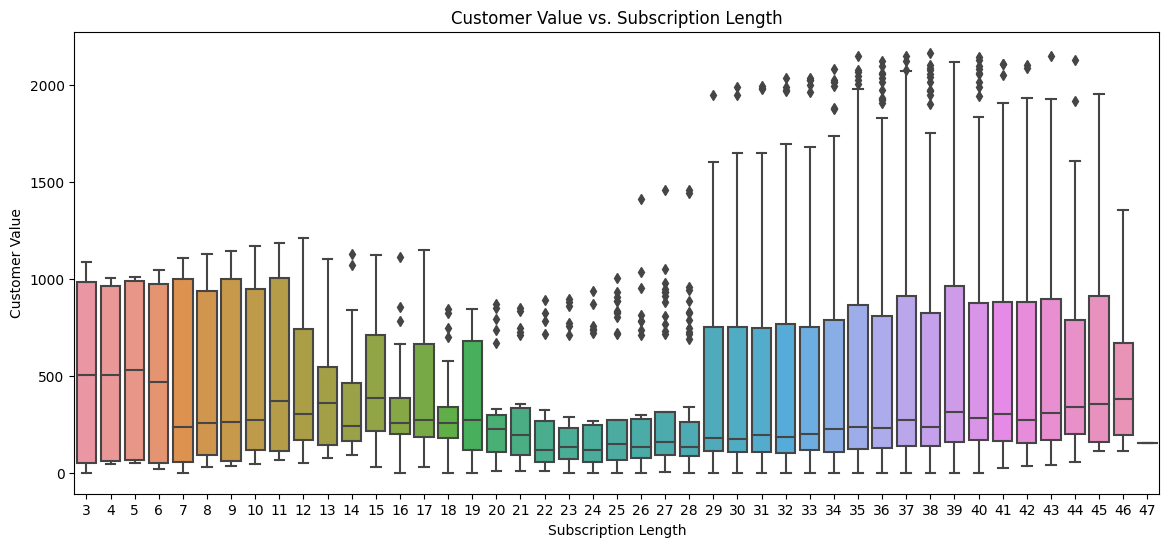

In [ ]:
# Examine how Subscription_Length is associated with the calculated value of the customer.
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Subscription_Length', y='Customer_Value')
plt.title("Customer Value vs. Subscription Length")
plt.xlabel("Subscription Length")
plt.ylabel("Customer Value")
plt.show()

- Variation in Customer Value: The wide range of mean customer values across different Subscription Lengths suggests that the duration of customer subscriptions can have a significant impact on their value to the company. Subscription Length seems to play a role in determining the overall spending behavior of customers.

- Importance of Long-Term Customers: Subscription Lengths with higher mean customer values indicate that customers who have been with the company for an extended period tend to have higher lifetime values. These long-term customers may have developed loyalty, trust, or are more likely to engage in high-value transactions.

- Subscription Length as a Predictor: Subscription Length appears to be a relevant predictor of Customer Value.

- One final observation is that the ranges of customer values for "Subscription_Lengths" 20 to 28 months are generally smaller compared to other lengths. This means that within this range of subscription lengths, customers tend to have similar or less variable values compared to other lengths. The narrower ranges between 20 and 28 months suggest that customers within this range have more consistent customer values, whereas customers with shorter or longer subscription lengths have more varied values.

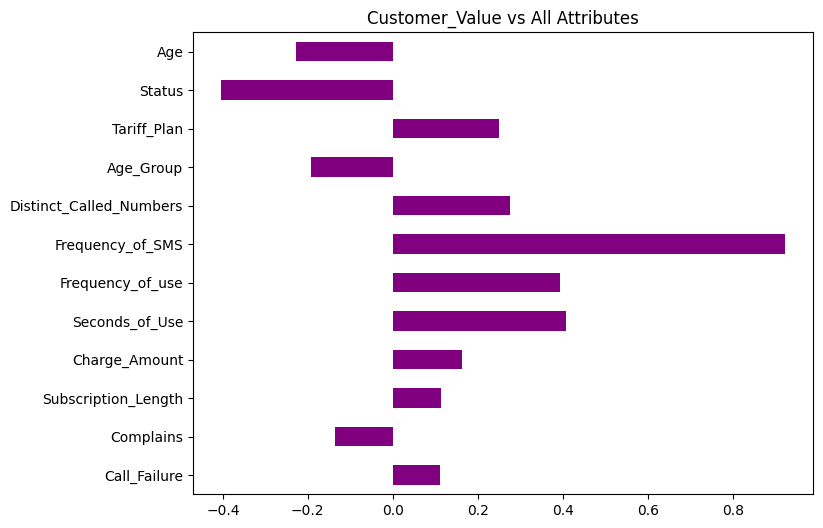

In [ ]:
# Feature importance on Customer_Value vs the rest of the attributes
corr_customer_value = df.drop(['Churn','Customer_Value'] , axis=1).corrwith(df['Customer_Value']).plot(kind='barh', figsize=(8, 6), color='purple', title="Customer_Value vs All Attributes")

Overall, the strongest positive correlations with 'Customer_Value' are 'Frequency_of_SMS', 'Seconds_of_Use', and 'Frequency_of_use', while the strongest negative correlations are 'Status', 'Age', and 'Age_Group'. The other attributes have weaker correlations with 'Customer_Value'.

To further investigate the relationship between 'Customer_Value' and 'Frequency_of_SMS', we can create a scatter plot to visualize the data points and see if there is any visible trend or pattern.

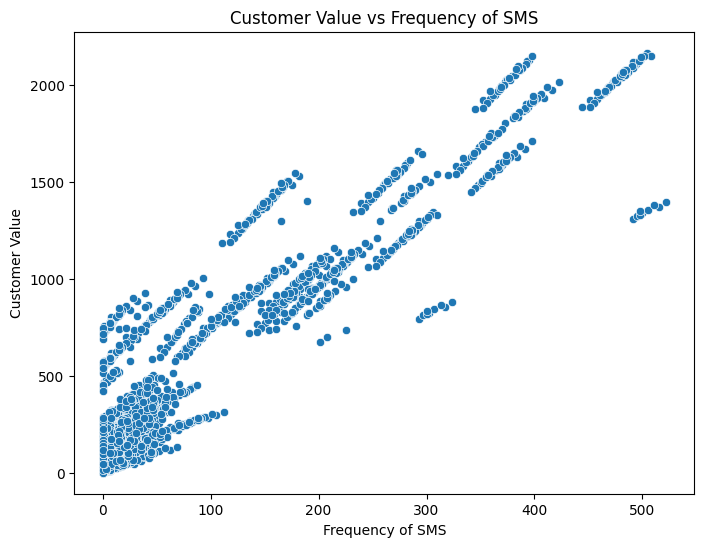

In [ ]:
# Examine how Frequency_of_SMS is associated with the calculated value of the customer with a scatterplot.
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Frequency_of_SMS', y='Customer_Value')
plt.title("Customer Value vs Frequency of SMS")
plt.xlabel("Frequency of SMS")
plt.ylabel("Customer Value")
plt.show()

In [ ]:
# View the correlation coefficient between these two variables
correlation_coefficient = df['Customer_Value'].corr(df['Frequency_of_SMS'])
print("Correlation coefficient between Customer Value and Frequency of SMS:", correlation_coefficient)

Correlation coefficient between Customer Value and Frequency of SMS: 0.9228524466060964


A correlation coefficient of 0.9228 between 'Customer_Value' and 'Frequency_of_SMS' indicates a strong positive linear relationship between these two variables. As the frequency of SMS increases, the customer value tends to increase as well.

We will perform a statistical test to assess the significance of this relationship, such as a linear regression analysis. A linear regression model will help us determine if the relationship between 'Customer_Value' and 'Frequency_of_SMS' is statistically significant and whether the relationship is best described by a linear equation.

In [ ]:
# Define the dependent variable (y) and the independent variable (X)
y = df['Customer_Value']
X = df['Frequency_of_SMS']

# Add a constant term to the independent variable
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the regression model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         Customer_Value   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                 1.635e+04
Date:                Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                        18:42:58   Log-Likelihood:                -19117.
No. Observations:                2850   AIC:                         3.824e+04
Df Residuals:                    2848   BIC:                         3.825e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              162.3785      4.445  

R-squared: 0.852 The R-squared value indicates that approximately 85.2% of the variance in 'Customer_Value' can be explained by 'Frequency_of_SMS'. This value suggests a strong association between the two variables, with 'Frequency_of_SMS' being a good predictor of 'Customer_Value'.

Coefficients:

The constant (intercept) is 162.3785. It represents the value of 'Customer_Value' when 'Frequency_of_SMS' is zero.
The coefficient for 'Frequency_of_SMS' is 4.2365. It indicates that for each unit increase in 'Frequency_of_SMS', 'Customer_Value' increases by approximately 4.24 units.
P-values:

The p-value for the 'Frequency_of_SMS' coefficient is close to zero (0.000). This implies that the relationship between 'Customer_Value' and 'Frequency_of_SMS' is statistically significant.
F-statistic: 1.635e+04 The F-statistic is a measure of the overall significance of the regression model. In this case, the F-statistic is very large, indicating that the model is highly significant.

Residuals:

The residuals are the differences between the observed 'Customer_Value' and the values predicted by the regression model. The Omnibus and Jarque-Bera tests assess the normality of the residuals. In this case, the small p-values for these tests indicate that the residuals are not normally distributed, suggesting some departure from normality.

Overall, the regression analysis confirms a strong positive relationship between 'Customer_Value' and 'Frequency_of_SMS'. The coefficient for 'Frequency_of_SMS' is positive, indicating that an increase in the frequency of SMS is associated with a higher customer value. The model is statistically significant and explains a substantial amount of the variation in 'Customer_Value'.

Let's have a brief look in the residuals with a Q_Q plot.

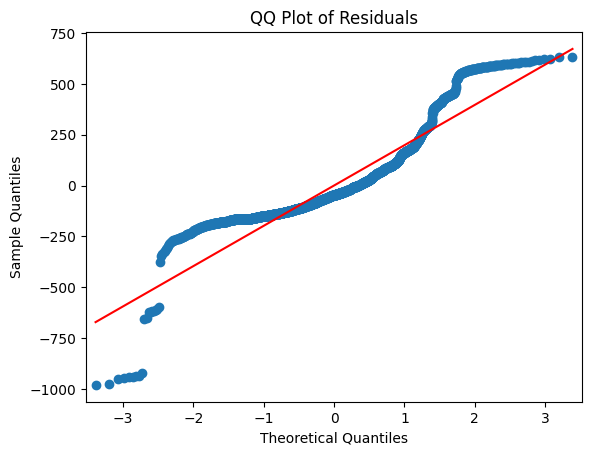

In [ ]:
residuals = results.resid

# Create the QQ plot
sm.qqplot(residuals, line='s')

# Add labels and title
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.title("QQ Plot of Residuals")

# Show the plot
plt.show()

We notice that the QQ_plot does not show a good fit, and it suggests that the assumption of normality for the residuals is not met. In other words, the residuals do not follow a normal distribution. Let's check for heteroscedasticity.

If the spread of the points in the QQ plot varies across the range of quantiles, it indicates heteroscedasticity. Heteroscedasticity implies that the variance of the residuals is not constant, violating one of the assumptions of linear regression.

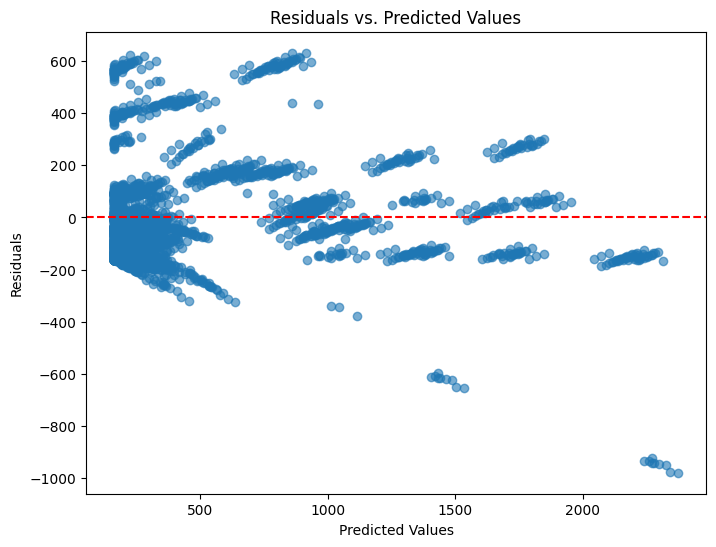

In [ ]:
# Get the predicted values from the model
predicted_values = results.predict(X)

# Calculate the residuals
residuals = y - predicted_values

# Plot the residuals against the predicted values
plt.figure(figsize=(8, 6))
plt.scatter(predicted_values, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()

Although we observed a strong positive correlation (correlation coefficient = 0.9228) between Customer Value and Frequency of SMS, it is important to note that our linear regression model may have violated the assumption of homoscedasticity, as evident from the non-uniform spread of residuals in the QQ plot.

However, given that our primary objective was to investigate the relationship between Customer Value and Frequency of SMS, we focused on interpreting the regression coefficients and assessing their statistical significance.

Future analyses may benefit from exploring alternative regression techniques that can account for heteroscedasticity.

In [ ]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1_customer_value = df['Customer_Value'].quantile(0.25)
Q3_customer_value = df['Customer_Value'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR_customer_value = Q3_customer_value - Q1_customer_value

# Calculate the lower and upper bounds for outliers
lower_bound_customer_value = Q1_customer_value - 1.5 * IQR_customer_value
upper_bound_customer_value = Q3_customer_value + 1.5 * IQR_customer_value

# Identify outliers based on the bounds
outliers_customer_value = df[(df['Customer_Value'] < lower_bound_customer_value) | (df['Customer_Value'] > upper_bound_customer_value)]

# Get the number of outliers
num_outliers_customer_value = len(outliers_customer_value)

# Print the number of outliers
print("Number of outliers in 'Customer_Value':", num_outliers_customer_value)

Number of outliers in 'Customer_Value': 104


In [ ]:
# Calculate the percentage of outliers in 'Customer_Value'
percentage_outliers_customer_value = (num_outliers_customer_value / len(df['Customer_Value'])) * 100

print("Percentage of outliers in 'Customer_Value':", round(percentage_outliers_customer_value, 2), "%")

Percentage of outliers in 'Customer_Value': 3.65 %


In [ ]:
# Separating the 'Customer_Value' for churned and non-churned customers
customer_value_churned = df[df['Churn'] == 1]['Customer_Value']
customer_value_non_churned = df[df['Churn'] == 0]['Customer_Value']

# Performing the t-test
t_stat, p_value = stats.ttest_ind(customer_value_churned, customer_value_non_churned)

print("T-test statistic:", t_stat)
print("P-value:", p_value)

T-test statistic: -15.993580728383115
P-value: 3.344199684366735e-55


The t-test statistic is approximately -15.99, and the p-value is extremely small (approximately 3.34e-55).

The t-test statistic measures how many standard errors the sample means are apart. In this case, the negative t-test statistic suggests that the mean customer value for churned customers is significantly lower than the mean customer value for non-churned customers.

The p-value is the probability of observing such extreme results (or more extreme) under the assumption that the null hypothesis is true. In this case, the extremely small p-value indicates strong evidence against the null hypothesis. The null hypothesis assumes that there is no significant difference in customer value between churned and non-churned customers. Since the p-value is far below the typical significance level (0.05), we can reject the null hypothesis.

Therefore, based on this statistical analysis, there is a significant difference in customer value between churned and non-churned customers. Churned customers tend to have significantly lower customer values compared to non-churned customers.

## 4.3 Correlation Analysis

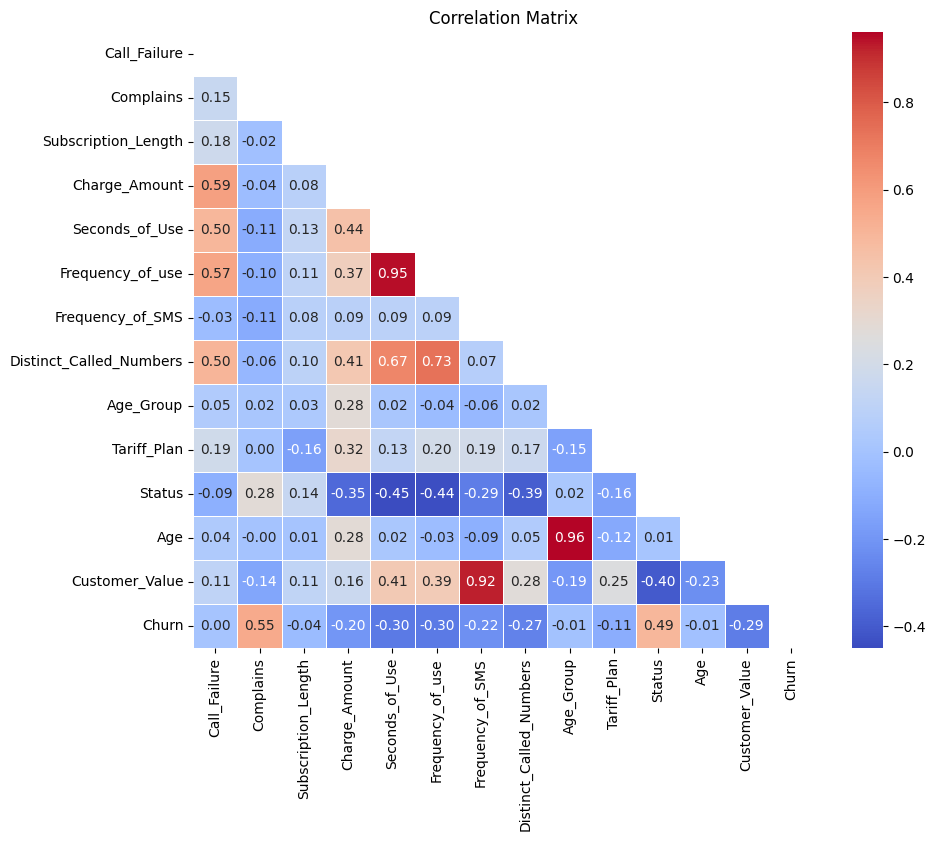

In [ ]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

- The attribute "Complains" has a relatively high positive correlation (0.55) with the target variable "Churn." This indicates that customers who lodge more complaints are more likely to churn.

- The attributes "Seconds of Use," "Frequency of use," and "Customer Value" have negative correlations with "Churn." This suggests that customers who use the service more frequently and have higher customer value are less likely to churn.

- The attributes "Charge Amount" and "Frequency of SMS" also have negative correlations with "Churn," indicating that customers with higher charge amounts and higher SMS usage are less likely to churn.

- The attribute "Status" shows a notable positive correlation (0.49) with "Churn," suggesting that non-active customers are more likely to churn.

It's important to note that correlation doesn't imply causation. While some attributes may show strong correlations with "Churn," it's necessary to further analyze the data and potentially build a predictive model to identify the most influential factors contributing to customer churn.

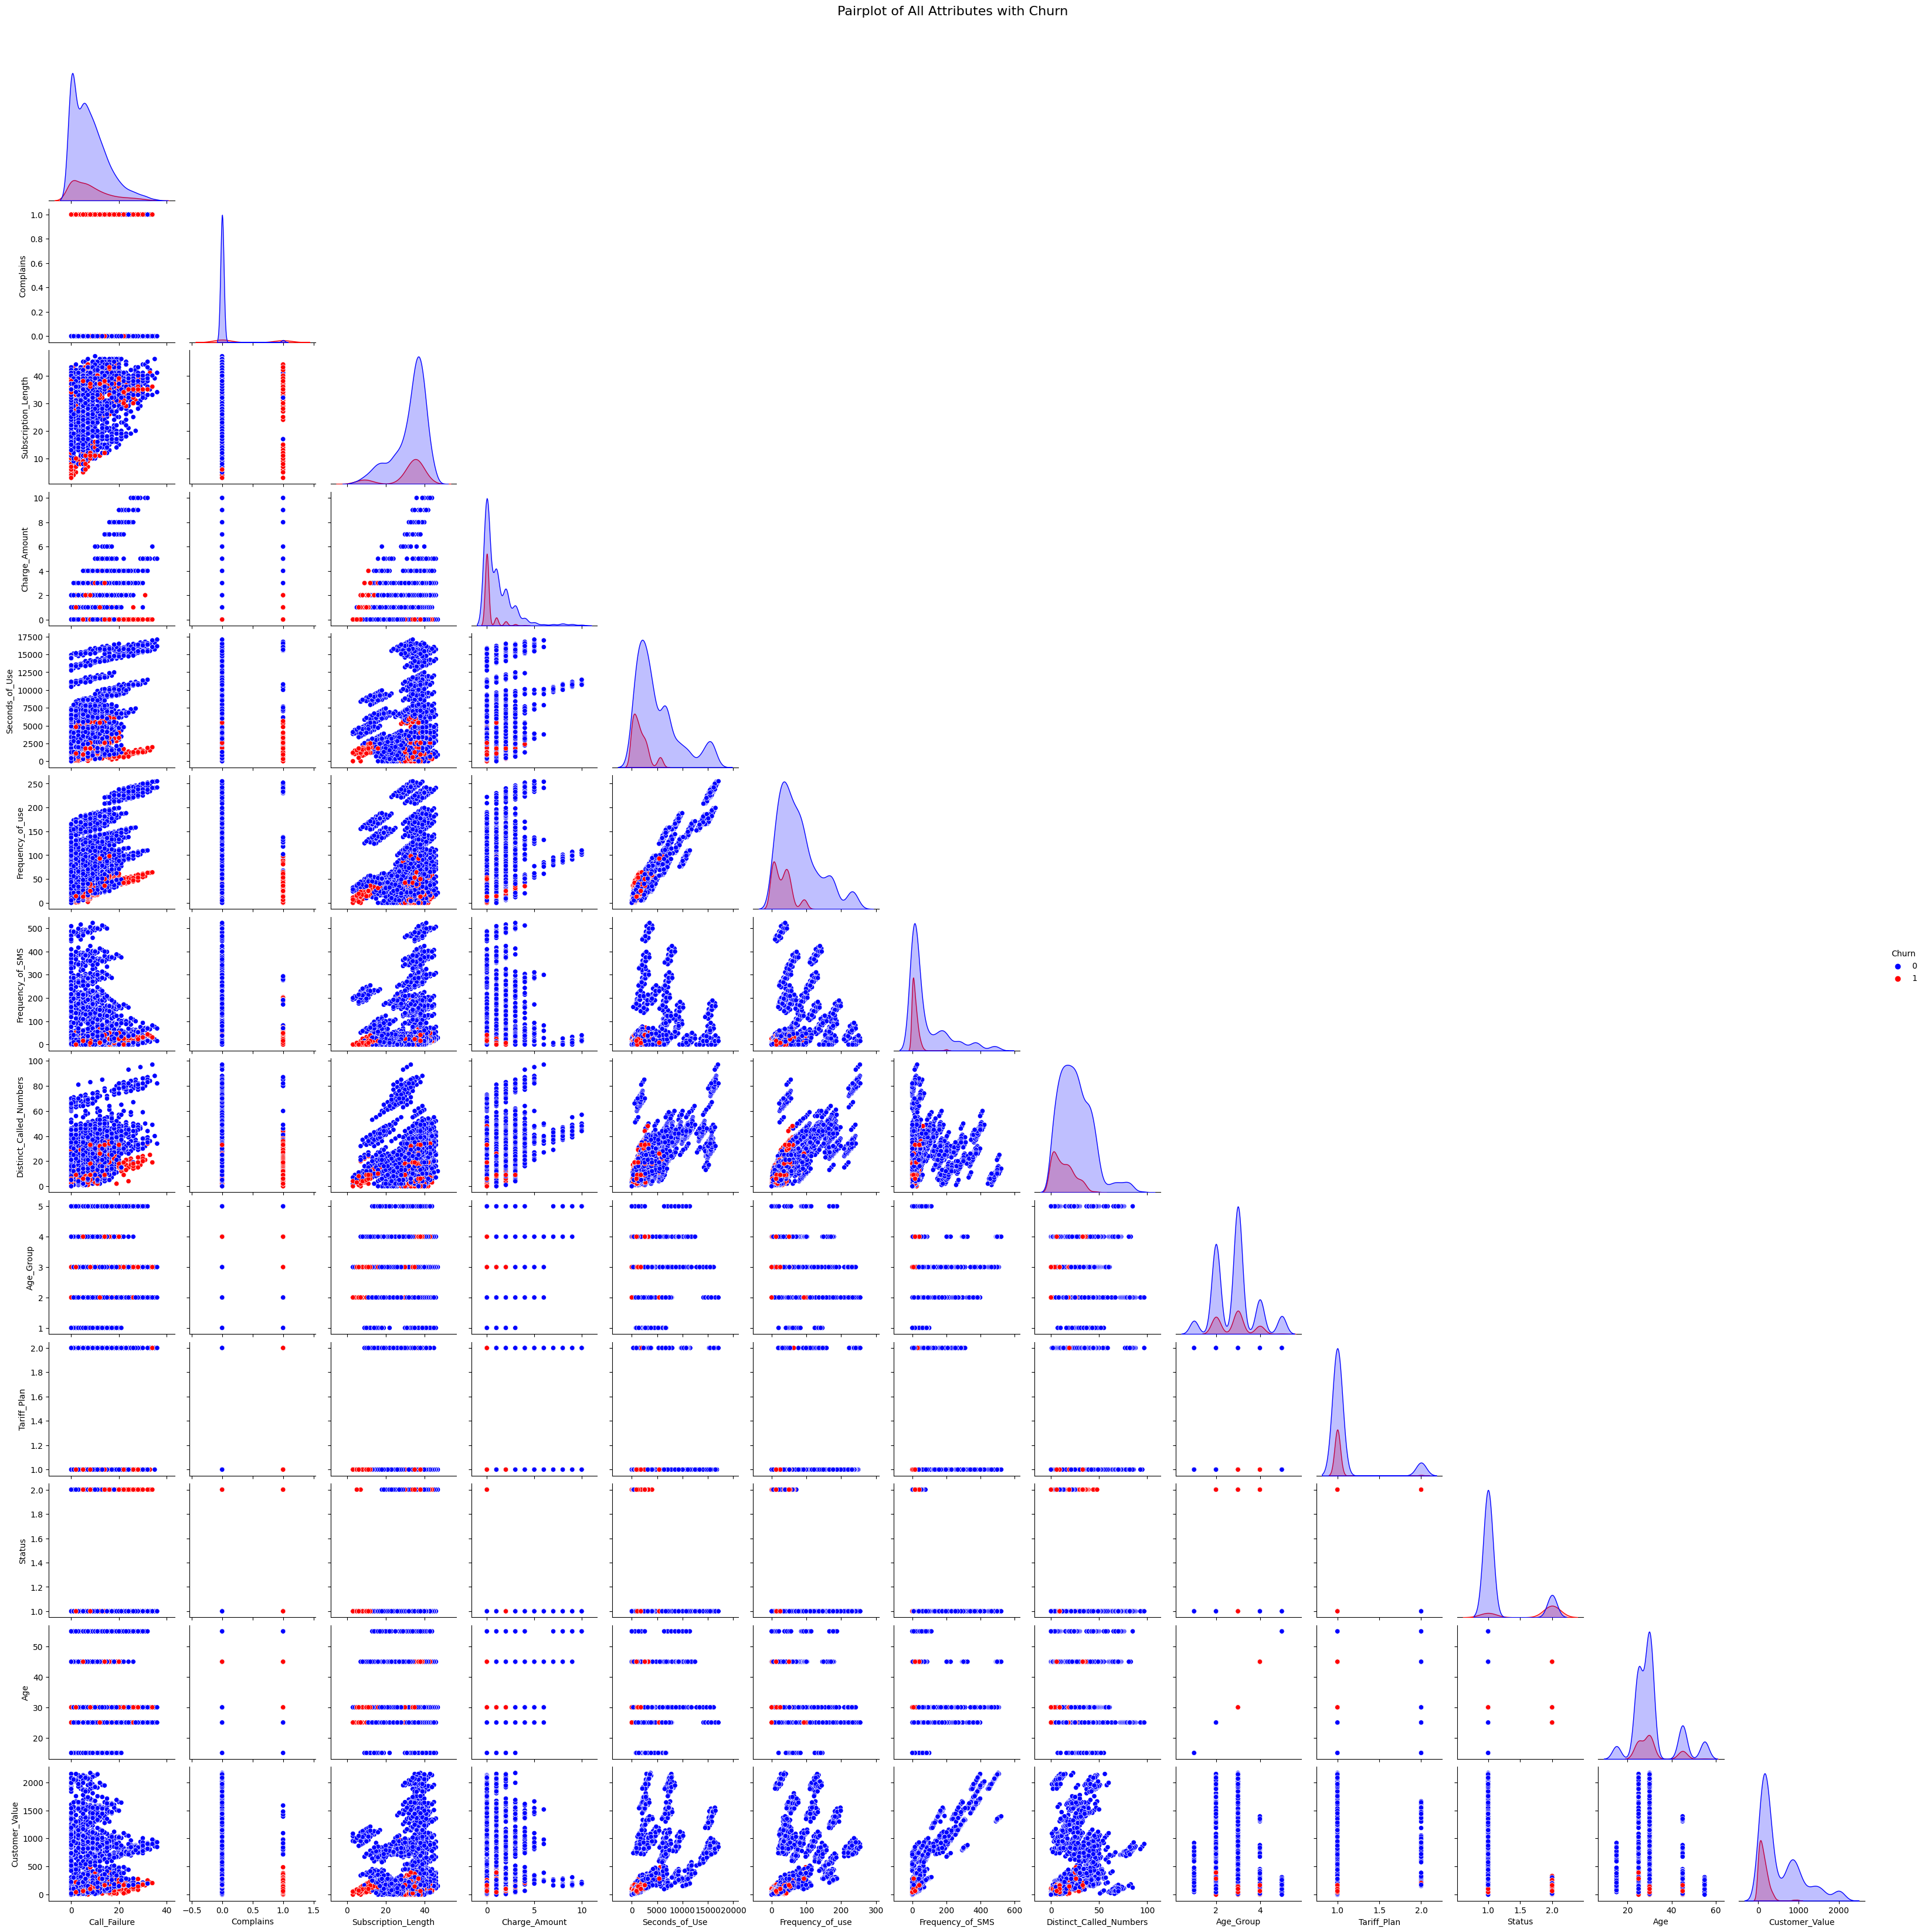

In [ ]:
# Create a pairplot for all attributes
sns.pairplot(df, hue='Churn', palette={0: 'blue', 1: 'red'}, diag_kind='kde', corner=True)
plt.suptitle("Pairplot of All Attributes with Churn", y=1.02, fontsize=16)
plt.show()

This pairplot displays scatter plots for each pair of the attributes against each other, with the hue representing the "Churn" status (churned vs. non-churned customers). The diagonal shows kernel density estimates (KDE) for the distribution of each attribute.

# 5. Model Building

## 5.1 Data Preprocessing for Model Training

In [ ]:
# Separate features (X) and target variable (y)
X = df.drop(columns=['Churn'])
y = df['Churn']

Before training and fitting the logistic regression model, we should scale the  columns that have significantly different scales and ranges, which can negatively impact the performance of our model. The rest of the columns have encoded categorical values.

In [ ]:
# Scale the numerical columns
scaler = StandardScaler()
X[['Charge_Amount', 'Seconds_of_Use', 'Frequency_of_SMS', 'Frequency_of_use', 'Distinct_Called_Numbers', 'Age', 'Customer_Value']] = scaler.fit_transform(X[['Charge_Amount', 'Seconds_of_Use', 'Frequency_of_SMS', 'Frequency_of_use', 'Distinct_Called_Numbers', 'Age', 'Customer_Value']])

## 5.2 Train-Test Split And SMOTE

In [ ]:
# Split the preprocessed and scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

As mentioned earlier, we have a class imbalance issue in our dataset, where the number of non-churned customers is significantly higher than the number of churned customers. Class imbalance can lead to biased model predictions, where the model may have a tendency to predict the majority class more frequently, resulting in poor performance for the minority class (churned customers, in this case). To address this issue, we can use the Synthetic Minority Over-sampling Technique (SMOTE).

SMOTE is a popular technique used to balance class distributions by generating synthetic samples for the minority class. The process involves creating synthetic examples of the minority class by interpolating new data points between existing minority class samples. By doing so, SMOTE effectively increases the number of minority class samples, creating a more balanced dataset for training the model.

In [ ]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Verifying the resampled data
print('Resampled dataset shape %s' % Counter(y_train_resampled))

Resampled dataset shape Counter({0: 1925, 1: 1925})


By handling the class imbalance issue with SMOTE, we ensure that the model can learn from a more representative dataset, leading to better generalization and improved performance on the test set.

It's essential to apply SMOTE only to the training set and not the test set to avoid data leakage and maintain the independence of the test set for evaluation purposes.

## 5.3 Model Selection - Logistic Regression

In [ ]:
# Create the Logistic Regression model
logistic_model = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)

## 5.4 Model Training

In [ ]:
# Train the logistic regression model on the resampled data
logistic_model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

## 5.5 Model Evaluation on Test Set

In [ ]:
# Make predictions on the test data
y_pred = logistic_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [ ]:
# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8368421052631579
Precision: 0.49375
Recall: 0.8681318681318682
F1 Score: 0.6294820717131475


- Accuracy: 0.8368 (83.68% of predictions are correct)
- Precision: 0.4938 (Out of the predicted positive churns, 49.38% are correct)
- Recall: 0.8681 (Out of all the actual positive churns, 86.81% are correctly predicted)
- F1 Score: 0.6295 (Harmonic mean of precision and recall)

Overall, the model seems to have relatively high recall, meaning it is good at identifying churned customers. However, the precision is lower, indicating that there is a notable number of false positives (customers predicted as churned but are not actually churned). This trade-off between precision and recall is common in imbalanced data scenarios.

## 5.6 Interpretation of Model Coefficients

Interpreting the coefficients allows us to understand which features have the most significant impact on predicting churn. Positive coefficients indicate a positive relationship with churn, while negative coefficients indicate a negative relationship. It's important to consider these coefficients when interpreting the model's predictions and understanding the factors contributing to customer churn.

In [ ]:
# Get the coefficients and corresponding feature names
coefficients = logistic_model.coef_[0]
feature_names = X.columns

# Create a DataFrame to display the coefficients
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)

print("\nModel Coefficients:")
print(coefficients_df)


Model Coefficients:
                    Feature  Coefficient
1                 Complains     3.427050
10                   Status     1.422364
12           Customer_Value     0.982077
11                      Age     0.916120
4            Seconds_of_Use     0.860726
0              Call_Failure     0.161274
2       Subscription_Length    -0.046887
7   Distinct_Called_Numbers    -0.368211
9               Tariff_Plan    -0.589599
3             Charge_Amount    -0.985106
8                 Age_Group    -1.048425
5          Frequency_of_use    -2.304955
6          Frequency_of_SMS    -2.364391


- Features such as "Complains," "Status," "Customer_Value," and "Age" have positive coefficients, indicating that an increase in these features is associated a higher probability of churning.

- Features "Seconds_of_Use," "Call_Failure," "Subscription_Length," "Distinct_Called_Numbers," "Tariff_Plan," "Charge_Amount," "Age_Group," "Frequency_of_use," and "Frequency_of_SMS" have negative coefficients. An increase in these features leads to lower predicted values, while holding all other factors constant.

- Among all the features, "Frequency_of_SMS" has the largest negative coefficient, followed closely by "Frequency_of_use," indicating that the frequency of SMS and calls made by the customer has a strong negative impact on the predicted value.

- On the other hand, "Complains" and "Customer_Value" have relatively high positive coefficients, suggesting that customers who have lodged complaints and customers with higher calculated values tend to have higher predicted values.

- The "Age_Group" feature, representing different age groups, also has a noticeable negative coefficient, implying that older age groups tend to have lower predicted values compared to younger age groups.

Overall, the coefficients provide valuable insights into the relationship between each feature and the target variable, helping to identify the most influential factors in predicting customer behavior (churn or non-churn) in the telecom company's dataset.

# 6. Model Performance Analysis


## 6.1 Confusion Matrix


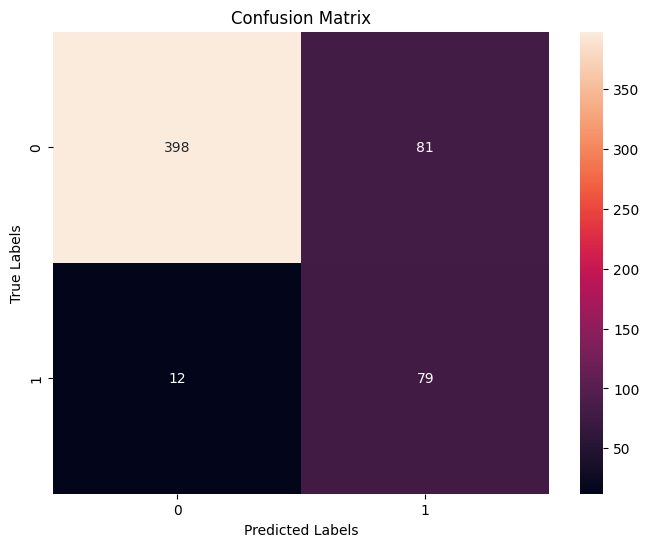

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

- True Positives (TP): 79
- True Negatives (TN): 398
- False Positives (FP): 81
- False Negatives (FN): 12

The confusion matrix indicates that the model correctly predicted 79 instances of the positive class (Churn = 1) as positive (True Positives) and 398 instances of the negative class (Churn = 0) as negative (True Negatives). However, the model also incorrectly predicted 81 instances of the negative class as positive (False Positives) and 12 instances of the positive class as negative (False Negatives).

## 6.2 ROC Curve and AUC

Here, the resulting ROC curve provides a visual representation of the model's ability to distinguish between churned and non-churned customers across different classification thresholds.

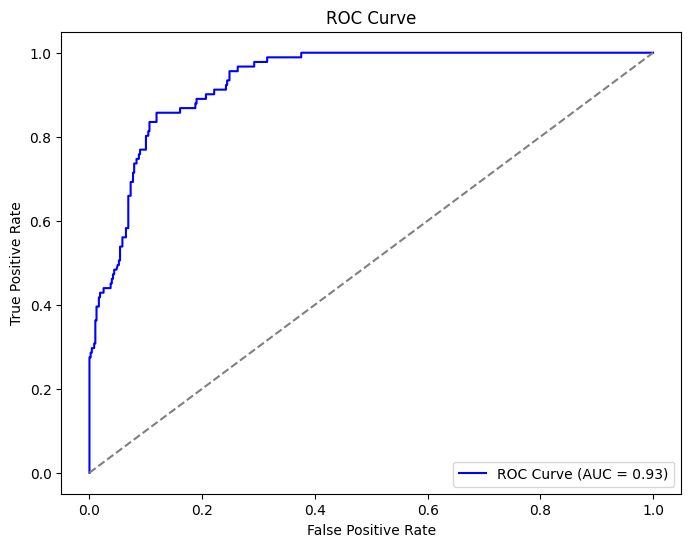

In [ ]:
# Get the predicted probabilities for the positive class
y_probs = logistic_model.predict_proba(X_test)[:, 1]

# Compute the ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute the ROC AUC score
roc_auc = roc_auc_score(y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

An AUC of 0.93 indicates that the model has a high discriminatory power and is quite effective at distinguishing between churned and non-churned customers. It means that the model is making good predictions and has a strong ability to rank positive (churned) instances higher than negative (non-churned) instances.

# 7. Improving Model Performance

## 7.1 Hyperparameter Tuning

To find the best hyperparameters for the logistic regression model, we can use GridSearchCV to search over a predefined set of hyperparameter values.


In [ ]:
# Create a logistic regression model
logistic_model = LogisticRegression(random_state=42, solver='liblinear')

# Define hyperparameters and their possible values for grid search
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'max_iter': [1000, 1500, 2000]
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

In [ ]:
# Train the logistic regression model with the best hyperparameters on the full training set
best_logistic_model = LogisticRegression(random_state=42, solver='liblinear', **best_params)
best_logistic_model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(C=100, max_iter=1000, random_state=42, solver='liblinear')

In [ ]:
# Predict the target labels on the test set
y_pred_test = best_logistic_model.predict(X_test)

# Predict the probabilities for the positive class (churned customers)
y_probs_test = best_logistic_model.predict_proba(X_test)[:, 1]

# ROC AUC score
roc_auc_test = roc_auc_score(y_test, y_probs_test)

# Accuracy, Precision, Recall, F1-score, and Confusion Matrix
print(f"Test Set Evaluation:")
print(f"ROC AUC: {roc_auc_test:.4f}")
print(classification_report(y_test, y_pred_test))

# Confusion matrix
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(conf_matrix_test)

Test Set Evaluation:
ROC AUC: 0.9321
              precision    recall  f1-score   support

           0       0.97      0.83      0.89       479
           1       0.48      0.86      0.62        91

    accuracy                           0.83       570
   macro avg       0.73      0.84      0.76       570
weighted avg       0.89      0.83      0.85       570

Confusion Matrix:
[[396  83]
 [ 13  78]]


The precision of 0.48 means that when the model predicts a customer will churn (positive class), it is correct around 48% of the time. The recall of 0.87 indicates that the model correctly identifies around 87% of the actual churned customers.

The ROC AUC score of 0.9321 is very good, indicating that the model is performing well in distinguishing between churned and non-churned customers.

However, the F1-score of 0.62 shows that there is room for improvement in finding a better balance between precision and recall.

To improve the model and find a better balance between precision and recall, we can try threshold adjustment. By default, the logistic regression model uses a threshold of 0.5 to predict the positive class. By lowering the threshold, we can increase recall at the expense of precision and vice versa.

In [ ]:
# Get the predicted probabilities for the positive class
y_probs = best_logistic_model.predict_proba(X_test)[:, 1]

# Adjust the threshold to improve the balance between precision and recall
new_threshold = 0.7
y_pred_adjusted = (y_probs >= new_threshold).astype(int)

# Evaluate the model with the new threshold
print("Adjusted Accuracy:", accuracy_score(y_test, y_pred_adjusted))
print("Adjusted Precision:", precision_score(y_test, y_pred_adjusted))
print("Adjusted Recall:", recall_score(y_test, y_pred_adjusted))
print("Adjusted F1 Score:", f1_score(y_test, y_pred_adjusted))

Adjusted Accuracy: 0.8859649122807017
Adjusted Precision: 0.6083333333333333
Adjusted Recall: 0.8021978021978022
Adjusted F1 Score: 0.6919431279620853


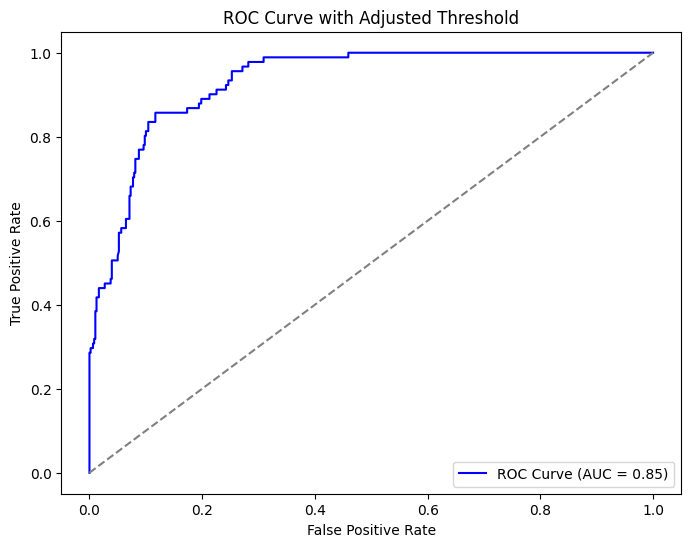

In [ ]:
# Get the predicted probabilities for the positive class with the new threshold
new_threshold = 0.7
y_pred_prob = best_logistic_model.predict_proba(X_test)[:, 1]
y_pred_adjusted = (y_pred_prob >= new_threshold).astype(int)

# Compute the ROC curve values for the adjusted predictions
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_adjusted)

# Plot the ROC curve for the adjusted predictions
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Adjusted Threshold')
plt.legend()
plt.show()

## 7.2 Model Interpretability

Using feature coefficients from the logistic regression model allows us to understand the average effect of each feature on the model's predictions across the entire dataset. This approach is useful for understanding the general relationships between features and the target variable (churn) at a global level.

                    Feature  Coefficient  Abs_Coefficient
6          Frequency_of_SMS    -5.026400         5.026400
12           Customer_Value     3.788311         3.788311
1                 Complains     3.738708         3.738708
5          Frequency_of_use    -2.684687         2.684687
10                   Status     1.505828         1.505828
11                      Age     1.140273         1.140273
8                 Age_Group    -1.107008         1.107008
3             Charge_Amount    -0.989551         0.989551
9               Tariff_Plan    -0.928485         0.928485
7   Distinct_Called_Numbers    -0.301749         0.301749
4            Seconds_of_Use     0.252724         0.252724
0              Call_Failure     0.169852         0.169852
2       Subscription_Length    -0.049613         0.049613


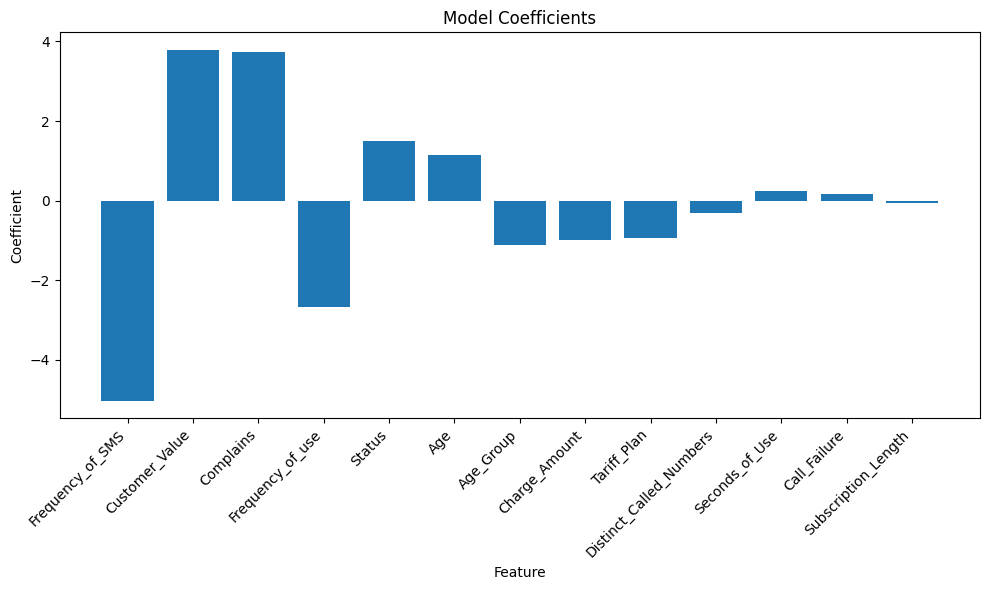

In [ ]:
# Get the model coefficients and feature names
coefficients = best_logistic_model.coef_[0]
feature_names = X_train.columns

# Create a DataFrame to store the coefficients and their corresponding feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the coefficients based on their absolute values to see the most important features
coefficients_df['Abs_Coefficient'] = abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

# Display the coefficients in descending order of importance
print(coefficients_df)

# Plot the model coefficients
plt.figure(figsize=(10, 6))
plt.bar(coefficients_df['Feature'], coefficients_df['Coefficient'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Model Coefficients')
plt.tight_layout()
plt.show()

- "Frequency_of_SMS": This feature has the highest absolute coefficient of 5.02. A higher value of "Frequency_of_SMS" is associated with a significant increase in the model's predicted churn probability. Customers who frequently send more SMS messages are more likely to be predicted as potential churners.

- "Customer_Value": With an absolute coefficient of 3.78, "Customer_Value" has a substantial impact on the model's predictions. Higher customer value leads to a higher predicted probability of not churning. Customers with higher calculated values are more likely to be predicted as non-churners.

- "Complains" has an absolute coefficient of 3.73, indicating that customers who have lodged complaints are more likely to be predicted as potential churners.

- "Frequency_of_use": The absolute coefficient for "Frequency_of_use" is 2.68. Higher "Frequency_of_use" leads to a higher predicted probability of churn.

- The "Status" feature with an absolute coefficient of 1.50 suggests that non-active customers (Status = 2) are more likely to be predicted as potential churners compared to active customers (Status = 1).

- "Age": The absolute coefficient for "Age" is 1.14, indicating that older customers are more likely to be predicted as potential churners.

- "Age_Group": The "Age_Group" feature has an absolute coefficient of 1.10, showing that specific age groups are associated with a higher predicted probability of churn.

## 7.3 Model Interpretability With SHAP Values

This section focuses on the fine-grained and individual-level interpretability that SHAP values offer, providing a more detailed understanding of how the logistic regression model arrives at its predictions.

 SHAP values provide a more granular view, allowing us to understand how each feature contributes to individual predictions on a per-sample basis. This approach helps us identify specific patterns and interactions that lead to specific predictions for different customers.


In [ ]:
# Fit the explainer
explainer = shap.Explainer(best_logistic_model.predict, X_test)

# Calculate the SHAP values
shap_values = explainer(X_test)

Permutation explainer: 571it [01:10,  6.28it/s]


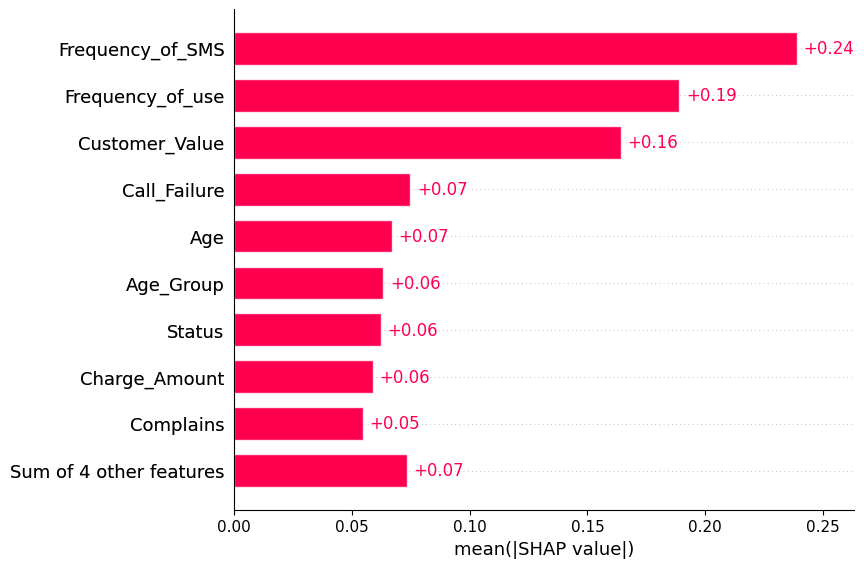

In [ ]:
shap.plots.bar(shap_values)

Also, the same results in another kind of plot for SHAP values that I personally prefer.

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


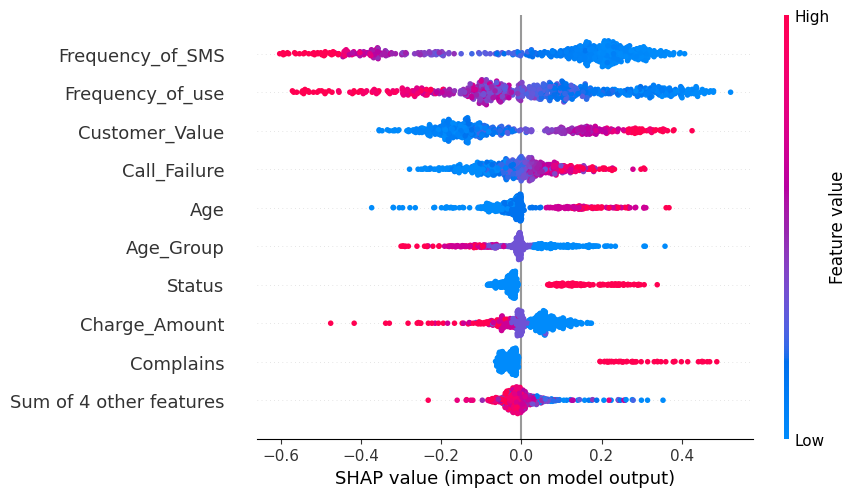

In [ ]:
shap.plots.beeswarm(shap_values)

In [ ]:
shap.initjs()

# Function for SHAP force plot
def shap_plot(j, model, data):
    # Create a SHAP explainer using Kernel SHAP
    explainerModel = shap.KernelExplainer(model.predict_proba, data)
    # Compute SHAP values for the selected data point
    shap_values_Model = explainerModel.shap_values(data.iloc[j])
    # Plot the force plot for the selected data point
    p = shap.force_plot(explainerModel.expected_value[1], shap_values_Model[1], data.iloc[j])
    return p

# Select a specific data point index for which you want to plot the force plot
data_point_index = 0

# Plot the SHAP force plot for the selected data point
shap_plot(data_point_index, best_logistic_model, X_test)

Comparing SHAP values with feature coefficients:
Upon comparing the SHAP feature importance results with the feature coefficients obtained from the logistic regression model, we can observe some differences in the rankings of feature importance. The top five important features based on SHAP values are as follows:

- Frequency of SMS
- Frequency of use
- Customer Value
- Call Failure
- Age


Similarly, based on the feature coefficients, the top five important features are:

- Frequency of SMS
- Customer_Value
- Complains
- Frequency_of_use
- Status

It is important to note that the rankings obtained from SHAP values and feature coefficients may not always match due to the inherent differences in the two methods. SHAP values provide a more comprehensive and nuanced understanding of the impact of each feature on the model's predictions, taking into account feature interactions and dependencies. On the other hand, feature coefficients from logistic regression represent the direction and magnitude of the linear relationship between each feature and the target variable.

Interpretation and insights:
The insights gained from the SHAP values offer a deeper understanding of the factors driving customer churn. Here are some key insights and implications:

- Frequency of use and Frequency of SMS: Customers who make more frequent calls and send more text messages are more likely to churn. This may indicate that highly active customers may find better deals or services elsewhere, leading to churn.

- Customer Value: Higher customer value is associated with a reduced likelihood of churn. Customers with higher lifetime value to the company may be more satisfied with the services and benefits they receive, leading to higher retention rates.

- Call Failure: Customers experiencing call failures are more likely to churn. Call failures may indicate poor service quality, perceived as unfavorable by customers.

- Age/Age Group: Younger customers (lower age group) have a higher probability of churn compared to older customers. This may suggest the need for targeted retention strategies for different age groups.

Based on these insights, we can make actionable recommendations to improve customer retention:

- Focus on improving service quality, especially for high-frequency users and customers with frequent call failures.
- Offer targeted promotions and rewards to customers with higher customer value to incentivize their continued loyalty.
- Implement customer support initiatives to address and resolve customer complaints promptly.
- Tailor marketing and retention efforts based on age group preferences and needs.

By leveraging the insights gained from the SHAP values, we can develop more effective strategies to mitigate customer churn and foster long-term customer relationships.

## 7.4 Sensitivity Analysis

Let's proceed with the sensitivity analysis where we remove outliers from the df_copy DataFrame and then evaluate the model's performance on this cleaned data.

In [ ]:
# Define the numerical columns to check for outliers and scale
numerical_columns = ['Seconds_of_Use', 'Frequency_of_SMS', 'Frequency_of_use', 'Distinct_Called_Numbers', 'Customer_Value']

# Calculate IQR for each numerical column and scale the data
for column in numerical_columns:
    Q1 = df_copy[column].quantile(0.25)
    Q3 = df_copy[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers from the column
    df_copy = df_copy[(df_copy[column] >= lower_bound) & (df_copy[column] <= upper_bound)]

# Check the shape of the DataFrame after removing outliers
print(df_copy.shape)

(1925, 14)


In [ ]:
# Separate features (X) and target variable (y) from the cleaned DataFrame
X_cleaned = df_copy.drop(columns=['Churn'])
y_cleaned = df_copy['Churn']

# Scale the numerical columns
scaler = StandardScaler()
X_cleaned[numerical_columns] = scaler.fit_transform(X_cleaned[numerical_columns])

# Split the preprocessed and scaled data into training and testing sets
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote_cleaned = SMOTE(random_state=42)
X_train_resampled_cleaned, y_train_resampled_cleaned = smote_cleaned.fit_resample(X_train_cleaned, y_train_cleaned)

# Verify the resampled data
print('Resampled dataset shape %s' % Counter(y_train_resampled_cleaned))

# Create a new logistic regression model
logreg_cleaned = LogisticRegression(C=100, max_iter=1000, random_state=42, solver='liblinear')

# Fit the model to the resampled data
logreg_cleaned.fit(X_train_resampled_cleaned, y_train_resampled_cleaned)

# Make predictions on the test data
y_pred_cleaned = logreg_cleaned.predict(X_test_cleaned)

# Evaluate the model's performance
accuracy_cleaned = accuracy_score(y_test_cleaned, y_pred_cleaned)
precision_cleaned = precision_score(y_test_cleaned, y_pred_cleaned)
recall_cleaned = recall_score(y_test_cleaned, y_pred_cleaned)
f1_score_cleaned = f1_score(y_test_cleaned, y_pred_cleaned)

print("\nAccuracy:", accuracy_cleaned)
print("Precision:", precision_cleaned)
print("Recall:", recall_cleaned)
print("F1 Score:", f1_score_cleaned)

Resampled dataset shape Counter({1: 1188, 0: 1188})

Accuracy: 0.7818181818181819
Precision: 0.5157232704402516
Recall: 0.9213483146067416
F1 Score: 0.6612903225806452


In [ ]:
# Original Model
y_pred_prob_original = best_logistic_model.predict_proba(X_test)[:, 1]

# Sensitivity Analysis Model
y_pred_prob_sensitivity = logreg_cleaned.predict_proba(X_test_cleaned)[:, 1]

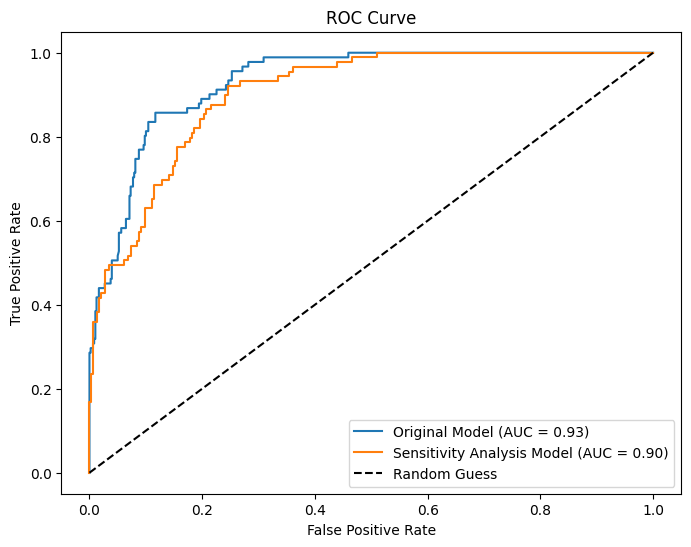

In [ ]:
# Calculate the ROC curve values for both models
fpr_original, tpr_original, _ = roc_curve(y_test, y_pred_prob_original)
fpr_sensitivity, tpr_sensitivity, _ = roc_curve(y_test_cleaned, y_pred_prob_sensitivity)

# Calculate the AUC (Area Under the Curve) for both models
auc_original = roc_auc_score(y_test, y_pred_prob_original)
auc_sensitivity = roc_auc_score(y_test_cleaned, y_pred_prob_sensitivity)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_original, tpr_original, label=f'Original Model (AUC = {auc_original:.2f})')
plt.plot(fpr_sensitivity, tpr_sensitivity, label=f'Sensitivity Analysis Model (AUC = {auc_sensitivity:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

After performing the sensitivity analysis and removing outliers, we have a cleaned dataset with 1925 samples and 14 features. The SMOTE technique was applied to balance the class distribution, resulting in a resampled dataset with 1188 samples for each class (Churn 0 and Churn 1).

The evaluation metrics for the logistic regression model on the cleaned data are as follows:

- Accuracy: 0.7818
- Precision: 0.5157
- Recall: 0.9213
- F1 Score: 0.6612

Original Model (without outlier removal):

- Accuracy: 0.8368
- Precision: 0.4938
- Recall: 0.8681
- F1 Score: 0.6295

Accuracy: The accuracy of the cleaned model decreased from 0.8368 in the original model to 0.7818 in the cleaned model. This indicates that the model's ability to make correct predictions on both churn and non-churn samples decreased after removing outliers.

Precision: The precision of the cleaned model improved from 0.4938 in the original model to 0.5157 in the cleaned model. This shows that the proportion of true positive predictions among all positive predictions increased after removing outliers.

Recall: The recall of the cleaned model improved significantly from 0.8681 in the original model to 0.9213 in the cleaned model. This indicates that the model's ability to correctly identify actual churn cases among all the positive samples increased after removing outliers.

F1 Score: The F1 score of the cleaned model increased from 0.6295 in the original model to 0.6612 in the cleaned model. The F1 score is a measure that balances both precision and recall, and its improvement suggests better overall model performance after outlier removal.

AUC: The area under the ROC curve (AUC) decreased from 0.93 in the original model to 0.90 in the cleaned model. AUC is a metric that evaluates the model's ability to distinguish between positive and negative samples. The slight decrease in AUC indicates that the model's discrimination ability decreased slightly after outlier removal.

Overall, after performing the sensitivity analysis and removing outliers, the model's performance slightly improved in terms of recall and F1 score, while the accuracy and AUC decreased. The improved recall suggests that the model is now better at correctly identifying churn cases. However, it's essential to strike a balance between the different evaluation metrics based on the specific goals and requirements of the business or application.

To sum up, based on the analysis and metrics obtained, we can say that the model is reasonably robust and performs well in predicting churn for the telecom customer dataset.

The sensitivity analysis provides insights into the model's robustness by evaluating its performance after removing outliers. The sensitivity analysis model still performs reasonably well, with only slight differences in the metrics compared to the original model. This suggests that the model's predictions are not highly sensitive to the presence of outliers in the data.

The model demonstrates good predictive power and performs well in identifying churn customers. However, there is room for improvement, particularly in terms of precision, which could be further optimized to reduce false positives. Additionally, further analysis, feature engineering, and model tuning could potentially enhance the model's performance and robustness even further.

# 8. Model Deployment


## 8.1 Save the Trained Model


In [ ]:
# Save the trained logistic regression model to a file
model_filename = 'trained_logistic_model.joblib'
joblib.dump(best_logistic_model, model_filename)

['trained_logistic_model.joblib']

## 8.2 Deploying the Model for Real-time Predictions

In [ ]:
# Load the trained model
loaded_model = joblib.load(model_filename)

# Make predictions on the new data using the deployed model
new_data = df.drop(columns=['Churn'])
predictions = loaded_model.predict(new_data)

# Display the predictions
print(predictions)

[1 1 1 ... 1 1 1]


In [ ]:
# Create a dictionary with the feature names and corresponding fake values
fake_data = {
    'Call_Failure': [1, 0, 1, 0],
    'Complains': [0, 1, 1, 0],
    'Subscription_Length': [30, 36, 25, 12],
    'Charge_Amount': [5, 8, 3, 9],
    'Seconds_of_Use': [50, 200, 400, 500],
    'Frequency_of_use': [100, 200, 70, 150],
    'Frequency_of_SMS': [20, 30, 25, 50],
    'Distinct_Called_Numbers': [20, 15, 30, 10],
    'Age_Group': [3, 4, 1, 5],
    'Tariff_Plan': [1, 1, 2, 1],
    'Status': [2, 2, 2, 2],
    'Age': [35, 50, 30, 50],
    'Customer_Value': [100, 500, 700, 1000]
}

# Create a DataFrame from the fake data
fake_df = pd.DataFrame(fake_data)

# Make predictions on the fake data using the deployed model
fake_predictions = loaded_model.predict(fake_df)

# Display the predictions
print(fake_predictions)


[1 1 1 1]


# 9. Conclusion


## 9.1 Summary of Findings


In this analysis, we aimed to predict customer churn in a telecom company using logistic regression. Through an in-depth analysis of the telecom customer dataset, we aimed to predict customer churn and gain valuable insights into the factors influencing churn rates. Our findings revealed several crucial points that can significantly impact the telecom company's customer retention strategies and business outcomes.

- Class Imbalance Mitigation: The dataset initially exhibited class imbalance, where non-churn customers (Churn=0) were significantly more prevalent than churn customers (Churn=1). To address this, we applied the Synthetic Minority Over-sampling Technique (SMOTE), which balanced the class distribution and improved the model's ability to predict churn accurately.

- Model Performance and Robustness: The logistic regression model demonstrated excellent predictive power and robustness. It achieved high accuracy, recall, and F1 score, indicating its proficiency in identifying potential churners. Additionally, the sensitivity analysis, conducted after removing outliers, showed only minor differences in performance metrics compared to the original model. This suggests that the model's predictions are not overly sensitive to the presence of outliers, enhancing its reliability.

- Key Predictors of Churn: We identified several features that significantly influenced churn prediction. The 'Frequency_of_SMS' (total number of text messages sent by customers), 'Customer_Value' (calculated value of customers), and 'Complains' (whether customers lodged complaints) were particularly impactful. Understanding these key predictors can help the telecom company implement targeted strategies to reduce churn rates effectively.

- Model Interpretability: The logistic regression model offers interpretability, allowing the company to gain insights into the importance of each feature in predicting churn. This transparency empowers the organization to focus on specific customer attributes to retain valuable customers proactively.

## 9.2 Strengths and Limitations of the Model


- The logistic regression model demonstrated several strengths, including its simplicity, interpretability, and efficiency in handling large datasets. It provided valuable insights into feature importance, allowing the telecom company to focus on specific customer attributes to reduce churn rates.

- However, the model has some limitations. It may not capture complex non-linear relationships between features and the target variable, and its performance could be further improved through more advanced modeling techniques like ensemble methods or deep learning.

## 9.3 Recommendations for the Telecom Company


Based on the analysis, we recommend the telecom company to consider the following actions:

- Implement targeted retention strategies: Focus on customers with high 'Frequency_of_SMS', as they are more likely to churn. Offering personalized promotions or incentives to these customers can enhance loyalty.

- Enhance customer value: Higher 'Customer_Value' was associated with reduced churn rates. The company should focus on strategies to increase customer value through service enhancements or loyalty programs.

- Improve Customer Experience and Quality of Service: Although not represented directly in the model, factors contributing to 'Frequency_of_Use' and 'Distinct_Called_Numbers' may impact churn. Continuously monitor and improve the quality of service, network coverage, and overall customer experience to encourage customer loyalty.

- Analyze Age Group-Specific Retention Strategies: The 'Age_Group' feature exhibits varying effects on churn prediction across different age groups.
Customize retention strategies based on the preferences and needs of different age groups. For instance, focus on tech-savvy offerings for younger customers and personalized services for older customers.

- Address customer complaints promptly: Customers who lodged complaints (Complains=1) showed a higher likelihood of churn. Improving complaint resolution processes and customer support can help retain these customers.

# 10. Future Steps


## 10.1 Additional Improvements and Extensions


To further improve the model's performance and enhance its applicability, the following steps could be considered:

- Feature engineering: Explore creating new features or transformations to capture potential non-linear relationships between features and churn.

- Model tuning: Optimize hyperparameters to fine-tune the model and potentially achieve better results.

- Ensemble methods: Explore ensemble techniques like Random Forest or Gradient Boosting to leverage the strength of multiple models.

## 10.2 Suggested Areas for Further Research

This analysis opens up several avenues for future research:

- Time-series analysis: Investigate churn trends over time and build time-series models to forecast churn rates in the future.

- Customer segmentation: Conduct clustering analysis to segment customers based on their behavior and characteristics, allowing for targeted marketing strategies.

- Customer satisfaction analysis: Examine customer feedback and satisfaction metrics to better understand the factors influencing churn.

By pursuing these future steps, the telecom company can gain deeper insights and develop more sophisticated models for predicting and reducing customer churn, ultimately improving customer retention and business outcomes.